In [10]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [38]:
import pickle
from pandas import DataFrame
from data_loader import make_test, basic_preprocessor, load_stored_test_data

# The name of the stored model to use
model_name = "my_lovely_model_1"

# If true, testing data created by split when generating the model will be used
# Set to false to use test_parquet instead
use_split_train_test = True

# If using a separate test dataset, you have to EITHER specify a classmap (0 = benign, 1 = malign)
# OR you can specify that the entire dataset consists EITHER of benign OR of malign data.
# The other option should be set to None.
test_parquet = "../floor/benign_2307"
test_classmap = None # { "my_benign_label": 0, "my_malign_label": 1 }
test_is_benign = True

In [39]:
# Load the testing data

if use_split_train_test:
    X_test, y_test = load_stored_test_data(f"../stored_models/{model_name}.test_data")
else:
    X_test, y_test = make_test(test_parquet, basic_preprocessor, test_classmap, test_is_benign)

In [40]:
# Load the stored model

with open(f"../stored_models/{model_name}.model.pickle.dat", "rb") as model_file:
    model = pickle.load(model_file)

# Prediction and accuracy evaluation
_(You can skip this if you just want to play with SHAP and explanations.)_

In [29]:
from sklearn.metrics import f1_score, classification_report, ConfusionMatrixDisplay

# Predict results for the testing set

predicted = model.predict(X_test)

In [30]:
# Print the classification results

print(f"Resulting F1: {f1_score(y_test, predicted)}")
print()
print(classification_report(y_test, predicted, digits=4))

Resulting F1: 0.993269795383712

              precision    recall  f1-score   support

           0     0.9962    0.9983    0.9973     27315
           1     0.9958    0.9907    0.9933     11098

    accuracy                         0.9961     38413
   macro avg     0.9960    0.9945    0.9953     38413
weighted avg     0.9961    0.9961    0.9961     38413



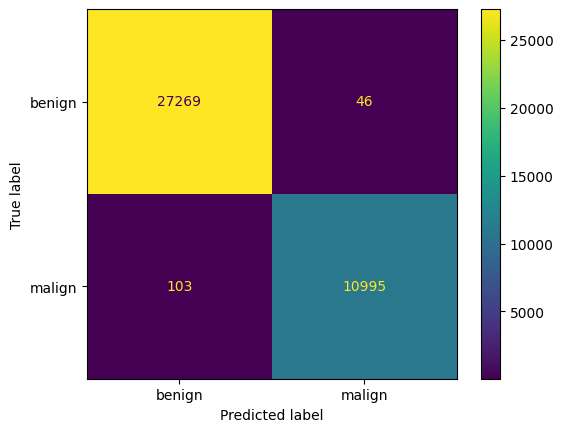

In [31]:
# Display the confusion matrix

ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, display_labels=['benign', 'malign'], values_format='d')

# Explaining the predictions
_(You can skip the second cell below if you have already run the SHAP explainer.)_

We can now use SHAP to gain insight into the model's predictions. First, shap values need to be computed for the test set. This is a computationally expensive process, but in practice, you can significantly reduce the time needed by using a narrower sample of the data, without affecting the results much. The following cell will compute shap values for the test set. It will also save the shap values to a file, so you can load them later without having to recompute them.

**Remember to run the first three cells in this notebook first!**

In [42]:
import shap

shap_sample_size = 0.5

shap.initjs()
explainer = shap.TreeExplainer(model)
shap_values = None
reverse_class_map = {  0: "benign", 1: "malign" }

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


In [ ]:
# Gather SHAP value. You can skip this if you've got them stored.

from sklearn.model_selection import StratifiedShuffleSplit

if shap_sample_size == 1.0:
    X_sample = X_test
else:
    # TODO: sample in a way that makes sense
    X_sample = X_test
    # sss = StratifiedShuffleSplit(n_splits=1, test_size=shap_sample_size, random_state=42)
    # for data_index, ff in sss.split(X_test, y_test):
    #     X_sample = X_test.loc[ff]

shap_values = explainer.shap_values(X_sample)
# save the values for later use
with open(f"../stored_models/{model_name}.shap_values.pickle.dat", "wb") as shap_file:
    pickle.dump(shap_values, shap_file)

KeyError: '[19255, 19626, 8625, 23604, 9553, 37505, 7909, 28848, 33415, 9211, 8448, 11706, 16795, 16370, 25887, 27672, 26919, 28077, 747, 4968, 11641, 5026, 31243, 1039, 11553, 35311, 9182, 28225, 32139, 6601, 26023, 34004, 28429, 35525, 24781, 10464, 18745, 24169, 3099, 33239, 14995, 4143, 3382, 18128, 11754, 35939, 36572, 5267, 10113, 8723, 4292, 37796, 494, 7160, 10422, 17588, 16170, 36398, 25457, 37025, 16718, 11805, 34837, 10001, 4686, 21211, 18012, 21772, 26044, 19789, 21722, 33205, 15030, 16836, 30166, 20138, 35158, 22273, 16136, 21762, 23648, 24613, 1011, 18312, 18995, 16127, 10288, 6646, 34389, 16646, 12005, 25217, 37098, 23112, 22232, 36706, 8097, 38244, 8279, 37972, 5302, 3438, 21169, 28329, 30096, 23280, 24390, 6367, 36715, 35127, 23278, 19755, 29003, 25408, 4626, 34984, 33846, 15760, 34150, 32829, 28691, 8890, 25580, 3800, 1071, 10078, 20647, 1056, 12245, 24953, 4383, 28542, 18050, 23961, 6356, 30031, 10214, 17025, 14706, 34698, 11380, 29338, 17818, 17904, 8768, 33548, 8289, 14592, 4526, 25623, 17014, 17227, 27484, 33596, 10097, 17398, 30407, 14018, 26870, 34456, 5469, 3840, 31647, 26877, 19721, 17392, 12906, 11689, 28425, 31882, 20308, 22488, 20223, 13844, 30937, 7527, 9906, 30637, 13880, 24933, 17436, 35117, 28505, 33020, 26846, 26886, 7127, 36225, 5841, 17975, 19260, 17285, 6960, 14410, 31545, 10905, 33309, 12264, 12982, 33545, 35521, 29804, 29517, 4819, 3362, 1235, 15673, 32711, 37249, 3430, 9747, 35166, 3260, 25340, 12016, 4427, 23211, 34172, 22238, 24504, 25493, 4756, 29727, 15562, 27651, 15801, 37443, 35691, 28447, 13066, 21475, 362, 37944, 2029, 16012, 10658, 18861, 328, 908, 28544, 1143, 18092, 16077, 34766, 12210, 15126, 2787, 24795, 37731, 22508, 14492, 13109, 28357, 12919, 21102, 1546, 15003, 24786, 29198, 24811, 4923, 32181, 9006, 24746, 26186, 32929, 5911, 26721, 7785, 32333, 26468, 35373, 34674, 29076, 17373, 12857, 12653, 37257, 19614, 21218, 24840, 19220, 19056, 27167, 4139, 19982, 28715, 23544, 25174, 17129, 37514, 26291, 37261, 29, 25234, 29923, 8785, 4792, 12711, 3030, 17135, 2910, 1107, 37113, 25149, 10912, 15141, 32460, 33073, 15791, 32690, 16356, 37264, 26609, 3220, 27220, 14118, 29796, 27324, 30907, 25390, 1194, 12558, 18163, 32809, 16731, 12001, 16976, 879, 37659, 21655, 20212, 33178, 17543, 35938, 23427, 20644, 35976, 21295, 38185, 13991, 703, 15693, 16658, 9163, 14523, 35449, 24382, 7549, 36076, 15136, 12267, 5022, 1849, 35851, 23526, 15024, 34758, 17119, 14496, 35299, 32973, 2321, 5605, 7051, 18877, 24028, 7398, 26862, 34542, 5087, 28528, 31309, 3848, 7009, 29519, 4493, 17700, 29470, 3931, 26712, 25699, 33910, 18483, 38407, 18680, 8363, 17041, 31767, 28163, 30651, 25683, 32323, 3390, 34405, 29364, 26193, 14955, 32137, 14599, 16958, 1775, 3625, 35629, 21789, 3323, 17729, 1957, 20961, 18845, 9847, 20866, 33878, 34116, 31951, 19745, 33530, 19376, 7563, 23844, 25407, 19609, 37163, 31835, 26411, 35181, 9364, 6199, 17050, 19927, 23473, 11545, 34836, 15074, 20836, 25137, 10285, 4305, 35042, 30158, 26911, 24271, 2556, 23166, 5619, 26554, 21300, 24570, 17595, 7434, 2055, 36714, 5955, 16226, 18622, 34309, 16380, 21835, 610, 8378, 27153, 2196, 21343, 13300, 12657, 7849, 134, 16010, 30787, 30278, 22678, 9196, 17146, 18629, 1365, 26022, 20091, 37666, 8333, 35874, 13807, 19836, 2791, 6743, 4991, 7875, 7167, 31084, 37522, 13556, 38172, 28573, 32716, 20930, 35405, 1202, 27880, 23560, 32880, 7433, 30247, 3745, 20974, 22102, 5141, 26504, 1541, 20218, 16051, 25136, 27440, 28175, 15004, 27744, 27031, 31622, 17064, 22270, 2929, 2164, 28177, 6354, 32278, 30582, 19881, 14707, 36786, 30763, 33874, 476, 18954, 18116, 31486, 1125, 12752, 2126, 24938, 14664, 33109, 5588, 735, 26683, 20111, 30693, 143, 7606, 19510, 30387, 8129, 33317, 24690, 32212, 24980, 37665, 37079, 5850, 33466, 27300, 27827, 33340, 20486, 12212, 17872, 15540, 12719, 24509, 19352, 12794, 4365, 28833, 32228, 27941, 37502, 13322, 5209, 12399, 14229, 20281, 25996, 20946, 38135, 25621, 11590, 5100, 19382, 26790, 8239, 34824, 37241, 13756, 32431, 973, 19237, 281, 9426, 4479, 10560, 16057, 25157, 9321, 32659, 36924, 20605, 18769, 17369, 29286, 13103, 25855, 34763, 2916, 25074, 33774, 32475, 21743, 17804, 5055, 16540, 26071, 633, 22602, 34605, 28752, 20425, 11824, 28162, 28214, 7347, 26343, 7007, 13523, 8204, 17649, 12931, 25486, 27692, 23645, 28262, 20369, 30799, 11765, 435, 8993, 12195, 21060, 13584, 4086, 7494, 19311, 36602, 36282, 32896, 27232, 35340, 14059, 35621, 10817, 4527, 5448, 6604, 19224, 17131, 7413, 32163, 35270, 34380, 1979, 23424, 13995, 37549, 4356, 31362, 12269, 27848, 26832, 24726, 16686, 1816, 75, 13403, 4507, 32093, 36006, 1906, 35109, 31152, 18675, 15969, 23356, 17379, 13678, 17010, 35289, 16615, 5234, 15880, 2974, 13145, 8611, 37470, 32260, 21237, 19747, 36719, 32740, 2559, 32434, 12107, 14999, 12134, 35586, 6767, 9951, 7483, 18836, 16486, 19697, 21697, 23343, 8712, 15106, 2686, 30110, 37729, 11202, 24672, 1487, 8146, 15215, 16743, 19406, 9823, 19885, 25713, 30248, 27996, 29959, 35159, 37680, 2381, 38259, 23271, 21934, 1524, 32637, 21344, 33264, 24984, 24745, 25007, 5592, 35839, 24766, 13086, 6187, 4698, 10146, 22528, 23378, 8007, 31498, 5555, 8386, 22566, 6730, 36846, 18618, 30162, 972, 18798, 35539, 32082, 21186, 3486, 34784, 31934, 24242, 35912, 34257, 27608, 26331, 37487, 11269, 34601, 30579, 28638, 473, 17823, 35322, 15017, 21903, 16465, 34230, 2434, 31789, 19516, 38210, 36815, 31016, 10281, 30537, 23463, 16132, 23679, 18923, 26520, 16421, 14753, 35320, 21926, 31706, 4485, 22118, 28944, 14331, 10174, 19356, 18395, 6243, 19928, 3531, 13754, 4597, 30490, 13882, 6157, 594, 6595, 28059, 36897, 29313, 28029, 36623, 36316, 27472, 14919, 31128, 34346, 4021, 11159, 8383, 37991, 24279, 32282, 2044, 6295, 7429, 13551, 30378, 19460, 2930, 26669, 780, 34779, 34043, 9446, 32008, 19199, 3419, 4386, 11234, 17527, 8827, 19223, 2129, 31270, 11918, 32708, 31147, 33588, 21681, 623, 22400, 1791, 30721, 26587, 36597, 26467, 24900, 23148, 36738, 3801, 16622, 31722, 16521, 5812, 22609, 18739, 34334, 25927, 21840, 34313, 23117, 20300, 28278, 24414, 12371, 29745, 9054, 18949, 10492, 11563, 38271, 12316, 15319, 31312, 32718, 3985, 12603, 23637, 9856, 8462, 34487, 33031, 36842, 15410, 11916, 19795, 30775, 38319, 16856, 26474, 10577, 22468, 24695, 11806, 29996, 30613, 12391, 15446, 17411, 3468, 32331, 35952, 20070, 5677, 16009, 22268, 22889, 30047, 7062, 14898, 13401, 18999, 1582, 33607, 12407, 33562, 25291, 8486, 19321, 30607, 366, 7028, 8535, 17187, 22495, 32101, 4391, 9141, 4174, 15502, 10000, 110, 3034, 28807, 2338, 34665, 3640, 31118, 1271, 21410, 4334, 35212, 34987, 23109, 46, 24916, 17341, 25750, 16475, 15755, 3503, 3383, 17319, 4669, 24494, 13310, 17172, 13963, 10870, 37544, 7508, 21827, 28478, 12594, 14728, 4557, 36319, 17636, 18595, 10322, 34094, 33756, 27625, 8264, 4720, 5783, 2504, 9477, 29228, 23542, 23301, 420, 31795, 26650, 6529, 34747, 33528, 3453, 12870, 8248, 34799, 9665, 1036, 777, 7258, 13102, 9567, 15782, 11518, 32641, 34850, 31907, 11647, 12142, 22091, 16438, 22167, 31671, 10762, 12022, 29058, 32024, 10213, 4158, 36250, 34958, 16820, 28618, 541, 4984, 27101, 16325, 25387, 16007, 38160, 29199, 19386, 13361, 27876, 13095, 28267, 12277, 4289, 14431, 6048, 22902, 9123, 6938, 5160, 10239, 30898, 15091, 12290, 12249, 6108, 34306, 2228, 28941, 4115, 26475, 30384, 25271, 36116, 30980, 18669, 37510, 37352, 12303, 37741, 6441, 734, 35697, 7366, 340, 29451, 17, 7846, 17424, 22780, 22726, 6479, 4111, 25867, 4710, 27456, 28283, 12372, 17613, 2022, 1867, 18687, 7531, 20275, 35870, 26253, 3530, 38342, 26908, 18077, 35309, 33277, 12908, 24255, 6521, 820, 10545, 26063, 16647, 36462, 1020, 16015, 12797, 35379, 19555, 33009, 28030, 35879, 11676, 9234, 4043, 24664, 19522, 37912, 31800, 9447, 7899, 17935, 22820, 26917, 33399, 23404, 12404, 3712, 1590, 23074, 9741, 32538, 34652, 18264, 37272, 2212, 28885, 14899, 33183, 23101, 29357, 33388, 34136, 27151, 19437, 31680, 37258, 4150, 13741, 32402, 33343, 17761, 15041, 32663, 30690, 2172, 7476, 4662, 1238, 35929, 37706, 2286, 4001, 20674, 36103, 24097, 20609, 26100, 6067, 25688, 31823, 36927, 12638, 31102, 27401, 19987, 24717, 28134, 36851, 13804, 16234, 37288, 24100, 13130, 6823, 25819, 16089, 28483, 4598, 24068, 26059, 14689, 21869, 14138, 761, 7668, 7863, 10254, 31484, 19232, 24529, 29009, 30521, 15186, 32810, 38277, 24103, 31467, 33457, 17174, 29874, 23249, 33749, 18878, 35979, 35787, 33768, 23580, 31376, 12490, 4653, 12726, 15313, 9197, 37928, 7010, 38269, 36796, 1543, 25433, 11653, 19068, 26937, 17154, 8444, 19349, 16478, 23829, 13087, 1826, 14876, 2118, 815, 17799, 25877, 38290, 13862, 19432, 21950, 28825, 30167, 4303, 2426, 17851, 19110, 6563, 2037, 36747, 38320, 23502, 34974, 28164, 6346, 20017, 34435, 5752, 5554, 36823, 27474, 30886, 21569, 36213, 11657, 16045, 26687, 32047, 36740, 11999, 17893, 27525, 12093, 34588, 6774, 7630, 19720, 29421, 12887, 21285, 3758, 4642, 1511, 23417, 37919, 35030, 5236, 35972, 6128, 9301, 17482, 11578, 13860, 26865, 28296, 31213, 32149, 35930, 7675, 24418, 8739, 5594, 18555, 5950, 10232, 29571, 4903, 9998, 34566, 33291, 22369, 3972, 18934, 13774, 20076, 27125, 17488, 26195, 35551, 16364, 4003, 13458, 29841, 1212, 543, 7305, 18274, 16446, 15201, 12679, 35748, 9894, 2284, 9946, 15686, 7564, 32660, 15706, 32087, 30654, 23934, 35610, 23944, 36893, 25842, 26035, 27453, 15388, 29842, 35058, 6937, 3418, 28958, 17865, 10982, 34386, 36606, 34037, 36805, 16343, 34902, 27378, 37871, 7448, 1336, 8793, 28808, 24184, 12631, 17094, 4480, 34148, 35582, 10943, 13136, 17576, 20413, 6548, 17938, 300, 27951, 23551, 30132, 19872, 17752, 4236, 22764, 14837, 25714, 30348, 28901, 4870, 6426, 30635, 34894, 4030, 11487, 4364, 1002, 3338, 22919, 5958, 15666, 11983, 32133, 11135, 36168, 3643, 10790, 37368, 23868, 4149, 17943, 3400, 20468, 34535, 33335, 12715, 17386, 4368, 22544, 28494, 33918, 28905, 27165, 5399, 10418, 26514, 30800, 36780, 23347, 1072, 25566, 3520, 11197, 22288, 19175, 14734, 16426, 31361, 5383, 17019, 898, 12166, 22596, 14877, 5909, 4337, 29103, 4925, 12666, 19339, 38251, 14716, 36376, 20055, 32176, 27568, 31762, 24841, 12099, 11674, 37581, 4273, 29536, 27772, 14657, 12382, 26748, 13651, 34767, 4033, 16659, 3473, 26315, 23037, 18270, 1614, 31387, 13702, 36312, 28221, 19823, 37723, 11835, 18431, 22451, 38131, 33096, 33313, 18446, 30717, 27963, 13183, 28432, 23242, 36532, 14438, 8416, 38284, 27026, 445, 13157, 17357, 4800, 29894, 7345, 37767, 8547, 26463, 37624, 3802, 3906, 31597, 20828, 17663, 2017, 3410, 17500, 17053, 19929, 32037, 37137, 19179, 37696, 18808, 10800, 10142, 2944, 28384, 15895, 34720, 32301, 8465, 12292, 16399, 1429, 37927, 32777, 874, 22818, 5865, 14279, 22576, 24728, 3093, 31235, 4053, 1974, 4510, 14110, 33835, 30125, 6422, 36899, 1332, 14111, 35229, 5179, 33492, 36072, 27362, 35290, 9785, 2375, 21910, 20193, 11825, 29334, 11050, 36470, 5514, 22985, 4460, 26793, 37840, 28840, 5262, 16328, 21700, 7331, 11778, 412, 10016, 37947, 8991, 7769, 14975, 3435, 12135, 25584, 28756, 20496, 17807, 8689, 19000, 10642, 20975, 36503, 6216, 19588, 18588, 2875, 33000, 31917, 17618, 1261, 38311, 38018, 10004, 26885, 15466, 24944, 8185, 20131, 33788, 28256, 19933, 32320, 34482, 17566, 9743, 2708, 16912, 31751, 32523, 22260, 29035, 749, 24457, 8380, 17084, 13033, 1352, 26121, 19559, 28255, 37815, 37579, 38059, 18607, 2906, 22074, 31036, 32540, 13930, 8123, 22556, 5626, 20265, 16754, 36118, 30270, 35390, 20364, 8953, 24514, 31849, 11693, 30093, 19041, 36590, 5500, 7700, 9832, 9176, 5261, 9777, 4910, 33265, 30291, 6088, 37462, 36263, 18849, 36505, 1502, 24580, 9429, 28769, 8110, 22908, 8912, 23445, 38263, 26020, 3082, 20821, 4411, 17890, 3053, 22948, 33242, 31093, 34131, 37394, 27570, 20767, 17260, 9580, 36152, 10057, 28334, 24576, 7864, 12347, 33636, 2682, 17352, 33288, 7646, 10018, 11289, 12207, 31364, 31447, 16833, 28678, 15678, 19424, 17933, 30762, 31163, 38151, 16374, 26211, 3691, 12626, 10282, 37764, 9436, 36857, 5331, 13819, 20923, 2544, 27785, 14797, 30364, 35622, 5825, 33877, 8895, 9659, 35423, 12613, 12455, 21123, 27678, 33787, 268, 13835, 27070, 28718, 26920, 14543, 25470, 31073, 33683, 16130, 23806, 32417, 26622, 3311, 33180, 36126, 4550, 30718, 18757, 5286, 31149, 3717, 13611, 10324, 38070, 7184, 12763, 2759, 34557, 6811, 24582, 16116, 2793, 23999, 15873, 15623, 13688, 25725, 24946, 21322, 10690, 31414, 24088, 17905, 27666, 29751, 30549, 11704, 23296, 18522, 33569, 4381, 667, 28213, 34861, 30225, 16636, 36671, 31305, 28150, 528, 11051, 31537, 16746, 30578, 1905, 11627, 7884, 12533, 1493, 11940, 14556, 25519, 6452, 13473, 15784, 37334, 24869, 21573, 28630, 24525, 10140, 278, 18308, 10687, 13538, 14554, 32466, 32682, 37286, 7968, 457, 31026, 38373, 34696, 24057, 37318, 9105, 30773, 37042, 28022, 2591, 16271, 22459, 34748, 12442, 36476, 28875, 31770, 24320, 34669, 19628, 1431, 21386, 32819, 22987, 14311, 26912, 31956, 20467, 36456, 34143, 10147, 9060, 24821, 35741, 30317, 32623, 13432, 37429, 9330, 1457, 10104, 8705, 35545, 16800, 30026, 4952, 31643, 275, 11666, 7816, 17473, 4602, 17120, 3522, 35427, 34685, 16318, 14747, 30183, 30622, 36405, 13889, 13566, 24250, 19914, 30868, 35453, 11579, 30493, 5170, 35638, 5609, 9425, 15401, 16084, 20189, 21529, 13138, 30168, 29045, 1729, 28785, 4628, 15476, 24492, 6404, 28392, 7103, 9609, 23411, 19444, 33047, 37281, 801, 31757, 16480, 4190, 37191, 4773, 13167, 34869, 35378, 12014, 21021, 6825, 30706, 12260, 8340, 37169, 22454, 14362, 16648, 25850, 37396, 3483, 36329, 1708, 6633, 1834, 24831, 26918, 38155, 34364, 9696, 6896, 11076, 11301, 34510, 36561, 5776, 18044, 23976, 12231, 13738, 6715, 15721, 28964, 35903, 3229, 11218, 35295, 14140, 24611, 24356, 6193, 15726, 27226, 6831, 22540, 21132, 16851, 20399, 28619, 8464, 25235, 3341, 24508, 14830, 24676, 19775, 33628, 10689, 9013, 13993, 15299, 15701, 14675, 939, 21196, 29969, 23441, 30179, 6808, 25798, 7891, 35138, 22510, 38169, 13899, 19753, 33419, 302, 17289, 25388, 4718, 12910, 30789, 3546, 3654, 25914, 24071, 8521, 13170, 13977, 8519, 32225, 25941, 20924, 1996, 14558, 35078, 26360, 19327, 35662, 29575, 19926, 34550, 31965, 1554, 37586, 25334, 25468, 33437, 29668, 30076, 18028, 7204, 10355, 21935, 14787, 3001, 2779, 15905, 14828, 25013, 34705, 32344, 35956, 6817, 9062, 27176, 22382, 27839, 35387, 18006, 33083, 8142, 15767, 10317, 22361, 30744, 31410, 19528, 797, 21807, 18507, 27040, 30700, 19770, 9566, 35605, 32644, 3735, 19004, 37077, 35932, 38383, 16013, 28290, 16554, 10310, 13229, 18731, 25587, 18871, 12068, 17546, 26268, 27791, 4081, 12600, 28919, 1766, 18635, 14326, 24702, 19967, 14092, 15444, 7584, 5455, 21036, 841, 11973, 35412, 38381, 5574, 18421, 9801, 7224, 23129, 26665, 29708, 16677, 2011, 11483, 34691, 25917, 28476, 13123, 36612, 12801, 20348, 15989, 32028, 35921, 17714, 13333, 3157, 2606, 15753, 20895, 10160, 1284, 13076, 33208, 14144, 27811, 27455, 34238, 16989, 31987, 30273, 33594, 29367, 9813, 11862, 19590, 30776, 18794, 17673, 17873, 35750, 20368, 16035, 10596, 20846, 56, 33483, 10894, 26288, 32974, 25067, 5571, 28468, 22265, 1805, 29621, 10956, 2449, 19993, 31893, 14920, 29083, 35132, 3957, 29221, 17220, 16680, 27321, 13395, 33405, 14956, 1390, 2893, 28722, 18642, 29404, 15520, 7155, 10231, 14512, 36471, 1310, 2630, 12056, 22164, 34549, 5342, 6443, 192, 833, 36286, 14, 21654, 18631, 12616, 22499, 8667, 38316, 19936, 36080, 7473, 2476, 15925, 5782, 23422, 4769, 34853, 17419, 26153, 18964, 11106, 26727, 35656, 11093, 28925, 5198, 26335, 33176, 823, 28757, 5871, 37946, 38410, 2792, 15188, 2024, 9695, 33130, 15453, 12866, 6147, 21089, 35482, 16429, 17839, 3353, 28359, 8228, 11261, 14603, 29164, 18327, 11596, 23368, 24945, 20473, 32748, 37768, 16825, 7176, 29682, 26750, 15609, 25990, 3786, 37188, 16245, 8214, 30069, 24322, 8686, 37920, 16834, 25942, 4473, 15966, 22241, 20579, 10030, 38228, 28641, 3232, 33141, 23118, 9463, 10389, 34527, 34949, 14704, 8334, 14824, 11139, 6333, 6651, 247, 18099, 36917, 37893, 33314, 33341, 13100, 3907, 8754, 1949, 1578, 28737, 23619, 4304, 11009, 19033, 30423, 16411, 23850, 4981, 18459, 11060, 18609, 20920, 28355, 28341, 3660, 6670, 6619, 21039, 32193, 38157, 1013, 16106, 1634, 12092, 23750, 16610, 11954, 3350, 11968, 2628, 25562, 23038, 8236, 19129, 13622, 10048, 33477, 27689, 23143, 35524, 24001, 125, 31425, 21366, 23465, 36153, 18337, 7840, 33362, 30711, 35875, 5974, 37480, 21985, 36614, 5576, 17152, 231, 35947, 17068, 12461, 21890, 35560, 2145, 6956, 16767, 21673, 26978, 14370, 14121, 5897, 23693, 7120, 14564, 17556, 20757, 24124, 22068, 8151, 16981, 30641, 11989, 37367, 9274, 30255, 17127, 15882, 19430, 425, 715, 3249, 10107, 36940, 27850, 30686, 512, 26621, 20733, 33056, 11842, 18638, 3947, 29299, 17112, 8048, 15707, 1285, 14470, 27162, 29298, 24762, 9456, 1818, 16987, 21811, 30990, 37622, 5478, 35675, 24391, 16955, 2828, 35568, 28420, 27522, 36082, 16681, 26866, 7492, 36764, 6664, 23497, 21412, 37012, 9004, 36858, 21305, 28291, 27422, 23532, 12401, 4022, 24445, 34619, 27526, 8971, 35937, 21315, 20671, 16802, 25328, 2005, 19414, 32266, 17361, 7477, 10975, 9699, 12235, 29388, 26490, 29475, 15903, 19453, 33438, 9204, 26041, 37850, 11536, 1422, 6618, 7058, 9807, 12764, 34718, 35520, 37250, 13237, 3612, 23849, 24284, 24732, 17418, 37235, 31651, 31618, 11302, 22453, 33854, 24159, 11888, 6812, 35537, 582, 28794, 26771, 7753, 13085, 30495, 27379, 9072, 23359, 8792, 4031, 24010, 17916, 19482, 3714, 22790, 13064, 9240, 37467, 19326, 7335, 25886, 16337, 1117, 7026, 18183, 8653, 6761, 28033, 32847, 33916, 18965, 5024, 1248, 15851, 30768, 34486, 23501, 22032, 37375, 7033, 22979, 11939, 1857, 2259, 21331, 29115, 10180, 10411, 13600, 33025, 28385, 12675, 29715, 21433, 2711, 18653, 36804, 35905, 28453, 11856, 1787, 30308, 2657, 6149, 16141, 33983, 30068, 35170, 24058, 16433, 2619, 27691, 10182, 36674, 2740, 22562, 19183, 28131, 36486, 7969, 13950, 8235, 12144, 16197, 2173, 23087, 18230, 25221, 20781, 29866, 19211, 14278, 31586, 34931, 26036, 36945, 21862, 27500, 26830, 6248, 13636, 28128, 36393, 11728, 28464, 16726, 11777, 35668, 7821, 6923, 5496, 1409, 8070, 20071, 8479, 10773, 33100, 20113, 27258, 9379, 33266, 9937, 32099, 10745, 31489, 20398, 1513, 21347, 33706, 36966, 14235, 21370, 9434, 2582, 36807, 21584, 10979, 27925, 10108, 38083, 5132, 1192, 28968, 15145, 37688, 8676, 4080, 6819, 12749, 32997, 15664, 25800, 12273, 22085, 32720, 26077, 15112, 35960, 1084, 20008, 30916, 18170, 25214, 38202, 2130, 17949, 82, 11305, 25201, 217, 36841, 25881, 37471, 36344, 296, 561, 15239, 1155, 18940, 13504, 8587, 19034, 35994, 11609, 37769, 14888, 6151, 16785, 34083, 37963, 37826, 15859, 14588, 32724, 36816, 35230, 23000, 18156, 15338, 8030, 8197, 31733, 25515, 16715, 1656, 37678, 34957, 13540, 37651, 27345, 35019, 18100, 8529, 7012, 11534, 34903, 8978, 27093, 37887, 31541, 36828, 24354, 14123, 24978, 31711, 10652, 2479, 8922, 9257, 36826, 28975, 20725, 30176, 6693, 18244, 13677, 692, 3158, 23641, 25330, 35933, 25732, 27584, 18695, 9444, 21314, 24147, 24079, 20090, 27879, 9990, 37364, 20241, 717, 18689, 17451, 28274, 8593, 37908, 8645, 2839, 31496, 29327, 35822, 33662, 32449, 33391, 8109, 19251, 9972, 11915, 17801, 20033, 32380, 28597, 12482, 34144, 12097, 19869, 8641, 5147, 28729, 25974, 19342, 19286, 22299, 32546, 22525, 21251, 7905, 23134, 26822, 19999, 12506, 26194, 35003, 5662, 8244, 29966, 8944, 37076, 18902, 25446, 5006, 1988, 979, 18694, 12341, 15773, 1377, 444, 3862, 24011, 2844, 19302, 10932, 35688, 37031, 36495, 70, 14482, 28884, 22329, 34274, 33850, 4601, 28045, 3039, 3813, 14232, 21310, 252, 5541, 38354, 30983, 19090, 26833, 30513, 9150, 29838, 29403, 34835, 6766, 6738, 35398, 3726, 25083, 23758, 37583, 34303, 10085, 18776, 5781, 19925, 37551, 30805, 12192, 22406, 1698, 13207, 24363, 6653, 20672, 2185, 34781, 25166, 16854, 33691, 4589, 16809, 3478, 26996, 22430, 28459, 13904, 34053, 18885, 31420, 1976, 34273, 3332, 30724, 26499, 35242, 20944, 14480, 25618, 13657, 37829, 17446, 22070, 4093, 33863, 1190, 26070, 11005, 14870, 10727, 1407, 16265, 12596, 31517, 29886, 10533, 28184, 28816, 13586, 14732, 25315, 11543, 20956, 24836, 10313, 4009, 5885, 16643, 22965, 9484, 37711, 24138, 348, 21453, 11359, 10424, 33864, 14590, 10226, 29295, 26330, 21871, 12125, 26387, 33743, 17919, 24204, 298, 35617, 38174, 33371, 23162, 12466, 37763, 4778, 36659, 20707, 20310, 5923, 20559, 2473, 19910, 11588, 5298, 8903, 19198, 30391, 23733, 189, 3182, 2174, 7316, 15021, 24748, 13886, 19479, 20417, 25063, 23425, 5818, 10808, 35210, 6191, 19813, 9533, 12486, 31299, 22089, 860, 29019, 11343, 11307, 20904, 14805, 26462, 5336, 35271, 3537, 22625, 17940, 30611, 12540, 15930, 1030, 13780, 25810, 3085, 24985, 19589, 38197, 28610, 24187, 33150, 15837, 31335, 9184, 27605, 6556, 12957, 15762, 18037, 9023, 21280, 28437, 23394, 17333, 26984, 19575, 1263, 28398, 3492, 23854, 25576, 1801, 1556, 3273, 11456, 36521, 1754, 7598, 12728, 36649, 25252, 20783, 6540, 33833, 32033, 2107, 12585, 33552, 5498, 13029, 9999, 28282, 6410, 1809, 9452, 34103, 15840, 16543, 37142, 1547, 3142, 36157, 11099, 34580, 651, 18180, 28417, 2281, 29348, 2108, 37992, 8560, 2484, 8800, 4559, 17966, 11120, 14980, 7067, 15431, 8170, 23736, 19293, 6813, 8072, 32381, 31778, 22180, 25073, 22148, 21330, 2745, 29427, 32957, 11444, 17794, 6597, 38389, 9703, 19497, 13347, 36391, 26776, 5914, 27297, 2423, 33497, 35523, 33103, 29322, 35015, 13996, 3177, 31758, 30013, 7761, 34232, 36203, 11200, 23515, 32602, 25327, 471, 31503, 13973, 25274, 13339, 3465, 1916, 32604, 37843, 2607, 16582, 21604, 24319, 3914, 14156, 17173, 30494, 23665, 3725, 29437, 34637, 26851, 2776, 37133, 36695, 24782, 16104, 7064, 36234, 27155, 14052, 37229, 22710, 23713, 14843, 22120, 6425, 31516, 30633, 35962, 19825, 35446, 10044, 653, 34959, 9633, 4551, 7959, 35072, 8940, 36016, 29121, 9707, 10916, 7011, 27824, 17575, 19125, 5424, 8543, 11712, 12064, 19949, 31690, 31403, 812, 25474, 19410, 27327, 3565, 15488, 3339, 29291, 8368, 16069, 29639, 6271, 29999, 24877, 25184, 6850, 8915, 694, 2066, 23527, 4548, 25066, 33652, 23029, 17867, 34128, 10874, 31681, 14050, 33279, 25582, 24885, 906, 5704, 34350, 32648, 9421, 34722, 7847, 36636, 36051, 24161, 18752, 37837, 28344, 24908, 35811, 27262, 6027, 31178, 14004, 17262, 38328, 6908, 15306, 20226, 15821, 15155, 22745, 7352, 16866, 195, 13459, 7682, 19859, 19779, 25012, 3064, 4129, 16417, 34328, 29289, 21739, 32552, 26103, 880, 37672, 29988, 31216, 32041, 11165, 31298, 17757, 3114, 20541, 37395, 6398, 17629, 8362, 19945, 8091, 32187, 11129, 7090, 23007, 23358, 30943, 6044, 21368, 11523, 34745, 19963, 14998, 25564, 37340, 25511, 38252, 4807, 27709, 5231, 1463, 20814, 29202, 6018, 7618, 20621, 3984, 30357, 7872, 12028, 12360, 2502, 31796, 3319, 6418, 23069, 27417, 21632, 30699, 13867, 35250, 28740, 18869, 2357, 34768, 20188, 24283, 30259, 1820, 9216, 31436, 29907, 27533, 2841, 20476, 32232, 7408, 28593, 27309, 18226, 32653, 31581, 22607, 1109, 24565, 17896, 256, 25604, 33765, 20728, 37780, 6547, 34801, 37573, 21027, 36060, 31322, 33295, 17121, 2085, 22836, 19089, 5762, 34797, 8770, 26946, 22027, 19478, 30948, 34785, 34583, 21146, 31222, 36855, 227, 2870, 2433, 5960, 3777, 557, 30743, 540, 26671, 18759, 36666, 7945, 26699, 37987, 13554, 22035, 13074, 12984, 22285, 29294, 34787, 34480, 12914, 2444, 7273, 26249, 13921, 11141, 32913, 6177, 35369, 2782, 5581, 31015, 24549, 35654, 34515, 26641, 9605, 7565, 741, 13391, 33065, 37993, 1518, 14361, 8696, 35208, 5369, 9120, 37145, 26656, 15007, 14304, 1616, 20762, 25434, 9866, 5189, 8619, 10683, 15621, 24353, 4538, 14037, 13212, 34844, 5553, 27442, 27538, 32441, 22154, 32701, 13637, 20732, 14078, 9967, 32049, 14203, 15140, 37181, 34097, 5064, 24472, 2569, 37841, 1807, 25704, 36723, 11882, 2253, 32727, 18730, 2699, 29455, 37572, 24881, 10513, 16065, 22946, 32143, 15545, 18792, 19513, 10388, 36326, 27789, 31837, 37821, 7890, 22155, 10588, 12073, 6210, 13979, 11265, 38017, 15261, 10139, 8394, 21303, 23185, 6470, 35179, 2905, 28436, 32142, 1363, 17962, 28338, 16737, 1730, 13888, 6099, 20913, 25481, 14142, 12782, 8708, 15082, 2819, 35173, 1956, 34111, 35010, 33227, 14771, 17346, 25031, 14171, 26955, 15156, 36295, 51, 37154, 12859, 31753, 17181, 28625, 11566, 11223, 11772, 10778, 8965, 30746, 21261, 18203, 9523, 15060, 28199, 17347, 28331, 14872, 16471, 4503, 7633, 35103, 7464, 25485, 16962, 30670, 5113, 1649, 20408, 6246, 12591, 34608, 31860, 3945, 23080, 36956, 11024, 18, 27208, 319, 37557, 12855, 10908, 3701, 13023, 37625, 7980, 32813, 17561, 19977, 34316, 30315, 19970, 12473, 18740, 24804, 8738, 11471, 15087, 12130, 34365, 37739, 32393, 31160, 3330, 13479, 13592, 24506, 30487, 25852, 1598, 36993, 10667, 26130, 30894, 23570, 26039, 25756, 31561, 33193, 25737, 7468, 21153, 7357, 25579, 16799, 19702, 7185, 33646, 12288, 15443, 34431, 16113, 23350, 35096, 36156, 28223, 35575, 25916, 21592, 958, 30739, 4317, 4648, 25536, 27729, 28935, 30540, 9730, 22096, 18379, 17937, 20078, 23680, 38295, 22106, 25970, 16604, 36615, 16213, 17522, 36218, 33061, 35699, 31174, 17089, 7179, 12880, 22039, 33839, 10246, 12571, 5099, 1432, 6844, 2184, 9366, 2042, 3109, 33816, 31816, 17781, 5393, 5061, 17160, 9752, 32875, 2533, 14074, 28130, 4762, 37036, 8526, 26122, 26086, 20906, 15161, 27249, 35749, 9607, 1765, 910, 14341, 32490, 34368, 36064, 5641, 11449, 12338, 7485, 33122, 12152, 9908, 23439, 30325, 38307, 27100, 9306, 13714, 13645, 3392, 394, 28869, 26867, 8621, 29498, 22601, 14760, 37080, 3481, 13116, 221, 16204, 19617, 26772, 1558, 32673, 5638, 4124, 28509, 4020, 18704, 26533, 1184, 18796, 23219, 2971, 37238, 21137, 342, 12507, 14394, 31899, 18239, 36961, 19254, 31054, 8544, 30383, 7489, 26517, 33888, 31103, 24174, 9909, 29755, 18709, 1862, 35318, 4979, 15581, 34062, 6278, 13976, 21274, 22523, 32233, 8342, 29491, 35321, 15771, 29897, 34979, 13040, 36113, 8958, 21542, 9504, 22930, 2830, 22519, 30527, 31684, 35860, 28552, 38084, 31847, 19005, 38247, 20815, 27635, 27150, 10399, 29004, 31829, 4569, 10951, 2086, 31977, 35038, 22501, 25462, 29239, 7656, 18463, 28305, 3833, 7942, 14725, 15006, 13770, 35587, 28340, 29797, 21106, 25352, 36594, 24735, 25003, 2256, 35120, 6402, 21216, 36261, 36177, 505, 6523, 36477, 2387, 35678, 17467, 21602, 15147, 31731, 5242, 5323, 63, 34899, 23622, 25787, 37509, 9774, 23938, 12932, 31116, 26743, 17743, 3767, 33432, 36933, 30351, 30904, 18391, 12790, 30442, 35882, 17540, 28102, 17429, 4005, 27617, 33446, 8276, 36098, 21720, 13743, 29852, 21489, 25320, 18749, 7119, 32476, 16088, 10582, 29161, 14298, 23861, 29653, 10046, 33448, 34802, 3286, 7432, 23259, 34209, 37219, 36543, 3719, 10431, 24753, 20062, 15738, 16412, 3408, 10604, 2829, 12907, 8533, 15002, 19598, 32827, 18791, 26246, 3424, 23390, 13969, 638, 15271, 2869, 8348, 7620, 17001, 22901, 1066, 14265, 30212, 14848, 22835, 15826, 23507, 427, 1156, 29249, 23929, 8957, 34966, 18835, 19587, 20426, 5823, 5851, 326, 26668, 20639, 17547, 6508, 1468, 11849, 29566, 17703, 3422, 3587, 17091, 9297, 11151, 22022, 18254, 16844, 6363, 25695, 35519, 20250, 36338, 11290, 25781, 35777, 20, 23133, 23222, 32240, 18545, 2581, 28251, 996, 23009, 28147, 8584, 27702, 3796, 31126, 35112, 33002, 23027, 31662, 30279, 23860, 11180, 28524, 20662, 34536, 15526, 23124, 20659, 37948, 24203, 14101, 19719, 35399, 20773, 14879, 24377, 23668, 20758, 34298, 26101, 2312, 34049, 34173, 333, 31247, 1544, 1208, 14965, 16176, 24080, 25883, 17247, 12595, 27287, 21966, 27064, 11741, 17701, 29387, 15297, 13277, 10302, 24296, 28591, 23384, 30538, 10489, 21587, 20306, 27551, 2568, 37347, 27831, 17086, 27491, 2640, 6795, 25766, 36043, 5886, 4248, 12868, 23995, 6530, 13907, 36794, 30580, 13451, 9099, 11535, 35813, 9837, 22384, 28532, 1147, 7080, 32867, 37744, 3409, 21954, 31008, 37536, 7703, 5707, 20775, 11280, 35338, 13968, 34245, 37497, 34225, 3572, 29443, 15345, 20776, 37713, 2355, 33813, 30102, 95, 25132, 16286, 20155, 16749, 17133, 33952, 22914, 6290, 32013, 29702, 33887, 29175, 32043, 13823, 15524, 25010, 17198, 5365, 15627, 27263, 29259, 33117, 34700, 24350, 15197, 28063, 8160, 6489, 17502, 8874, 22018, 23945, 14831, 4267, 19746, 16222, 34882, 15646, 130, 3544, 5952, 37128, 36478, 6735, 19025, 1947, 7711, 23517, 9275, 1517, 12007, 34753, 35310, 26660, 21015, 16023, 15390, 21716, 23332, 27330, 16387, 23429, 37801, 13470, 37091, 30072, 26037, 18080, 18157, 32583, 21826, 29017, 32638, 7695, 35294, 27870, 25095, 11762, 9531, 23081, 12925, 11185, 32435, 4794, 7443, 25287, 37089, 8432, 12714, 6375, 33360, 30996, 22296, 30872, 4813, 17391, 36965, 25822, 20484, 12587, 11299, 7782, 5938, 17389, 10988, 36164, 7833, 29531, 17603, 31501, 2553, 12155, 37735, 37614, 20820, 11168, 6415, 14518, 13166, 30853, 24170, 29805, 389, 24621, 33258, 32150, 19602, 20024, 15419, 2550, 35475, 27141, 13608, 31825, 448, 29111, 34090, 15692, 5913, 16611, 12987, 2884, 37184, 24673, 36660, 7811, 22443, 28182, 4109, 35365, 9395, 35624, 5883, 5085, 33753, 25816, 34353, 37094, 1325, 28222, 31918, 14834, 37895, 18499, 29134, 23141, 15230, 30551, 6196, 5137, 37681, 22594, 1856, 15036, 14031, 37932, 35963, 4468, 31827, 3742, 16435, 18986, 17670, 27000, 31925, 20743, 27769, 13279, 10292, 18357, 17717, 34091, 3179, 1650, 20274, 36638, 25090, 8010, 13437, 37955, 29524, 6396, 23557, 814, 28708, 3637, 13233, 12105, 30246, 30931, 21776, 11476, 8815, 19240, 4758, 34410, 13332, 35975, 31672, 24269, 20099, 8268, 5259, 29044, 29209, 23449, 954, 198, 37003, 29133, 23094, 21640, 24437, 1697, 2059, 4689, 7341, 8552, 5315, 29490, 9116, 34135, 15467, 11214, 24554, 33085, 36185, 8637, 5757, 32295, 38107, 12739, 8105, 31725, 18633, 10835, 3952, 23796, 7159, 6203, 17684, 14634, 33834, 21222, 522, 16996, 25354, 7255, 27911, 17641, 22870, 37605, 22258, 5406, 11126, 6298, 14964, 710, 29473, 29383, 34488, 12539, 19397, 17013, 29276, 17760, 13833, 34296, 12584, 31527, 13701, 31058, 4704, 7667, 12867, 36791, 6053, 12086, 11547, 32761, 12378, 27331, 20085, 31100, 36838, 1901, 36777, 1741, 15645, 9861, 17222, 21662, 4783, 11655, 25228, 28667, 11524, 14234, 28183, 30968, 19280, 24644, 21422, 18343, 35297, 1681, 28336, 6979, 25601, 34186, 7639, 33357, 16306, 14660, 25591, 10154, 37989, 5223, 25393, 8347, 21265, 3178, 14883, 10883, 2744, 14686, 30728, 14611, 25575, 15365, 19209, 22090, 12640, 37477, 33428, 37366, 716, 28410, 33750, 26399, 6852, 6562, 7680, 6451, 6453, 25820, 10744, 11315, 1188, 3016, 21349, 7681, 9453, 684, 18611, 23283, 36992, 6587, 36724, 6220, 15374, 34107, 37218, 2371, 17816, 28375, 12890, 18948, 1954, 18458, 28726, 21198, 29995, 1559, 890, 28936, 16300, 29018, 5838, 8199, 18315, 22379, 1761, 2675, 3359, 25230, 18864, 20292, 23684, 17202, 28400, 12619, 28663, 9286, 10166, 28985, 29361, 10691, 33980, 9775, 33459, 24476, 21445, 8253, 7106, 22305, 16246, 35488, 9956, 3783, 5542, 20066, 13985, 25224, 1091, 38287, 30206, 17972, 37600, 21160, 246, 3155, 25795, 1101, 33384, 2506, 12796, 336, 2957, 5128, 20492, 28709, 33476, 12892, 23790, 9357, 25437, 16847, 32395, 8277, 17541, 34484, 10229, 23662, 31576, 22083, 9968, 8620, 10362, 28127, 35554, 8161, 20926, 24257, 36818, 14994, 15659, 23410, 3363, 37344, 25982, 31205, 11614, 12553, 29474, 7627, 17950, 30284, 23042, 30409, 21647, 33498, 16147, 26066, 22041, 15651, 36058, 20765, 8601, 12552, 22717, 31250, 15608, 26052, 5854, 25826, 38336, 24249, 25676, 19805, 28007, 12006, 34623, 37888, 22401, 11837, 22434, 28949, 33119, 19988, 25231, 26599, 23772, 29903, 12819, 6130, 2448, 32127, 13831, 2348, 18387, 6316, 10241, 29314, 30851, 6292, 38386, 8226, 27979, 13147, 24622, 31464, 25254, 31472, 8242, 9157, 21930, 14391, 22224, 7510, 20167, 27090, 24540, 21975, 15529, 19067, 2769, 31841, 537, 7878, 28012, 28845, 29787, 20205, 25323, 19771, 7329, 733, 20527, 16567, 20654, 8870, 11907, 14122, 32066, 29877, 32155, 8046, 30600, 31401, 1130, 32161, 33044, 36540, 30774, 17061, 4348, 35829, 26786, 7740, 4608, 5155, 21786, 36859, 25840, 10482, 18716, 33844, 35066, 32657, 35853, 37451, 13265, 22435, 7960, 359, 30797, 6197, 28154, 28028, 32340, 25903, 6143, 8017, 27858, 5465, 2116, 30657, 7914, 11467, 36908, 2636, 4694, 34915, 4529, 23663, 11628, 36216, 9613, 29964, 12398, 14809, 10460, 8508, 14057, 19610, 8003, 24087, 36784, 10202, 15234, 11484, 26484, 18540, 13497, 35268, 31948, 16255, 55, 722, 11438, 25594, 33449, 4995, 30939, 5333, 9361, 16053, 7994, 35763, 23632, 5154, 38220, 782, 27867, 14347, 34272, 6936, 25622, 35859, 37421, 37268, 19210, 31034, 4799, 5653, 1024, 5724, 36641, 34991, 14402, 7856, 10751, 32797, 24873, 16182, 34185, 9914, 24534, 21669, 17159, 9430, 1732, 7365, 8989, 23039, 25108, 38001, 31635, 20388, 31964, 15078, 12846, 23002, 30605, 2323, 21371, 14571, 6486, 15505, 32318, 21062, 26147, 29891, 32372, 28110, 35603, 488, 30210, 13901, 33372, 24037, 5809, 1115, 37832, 15860, 32510, 13477, 8092, 30058, 12033, 38314, 20768, 20429, 32568, 10066, 33352, 26421, 29005, 19274, 17648, 16144, 12568, 10876, 24903, 9469, 26189, 22485, 23354, 34723, 17031, 4406, 31248, 9490, 23746, 12942, 23196, 13808, 27055, 37016, 10794, 2364, 563, 6939, 4260, 33968, 6355, 12070, 18363, 35988, 2798, 5564, 13696, 6409, 36591, 11886, 18824, 17939, 33946, 9256, 31729, 15418, 14577, 8299, 25606, 5954, 6511, 10032, 27697, 25159, 31946, 32413, 1642, 30781, 32749, 32336, 15675, 726, 12646, 22274, 32744, 37236, 24847, 18101, 5290, 13440, 32479, 22647, 11115, 32478, 15054, 12898, 2139, 9821, 32580, 32678, 22762, 11873, 17999, 26459, 9860, 15066, 38036, 25115, 25091, 18238, 29584, 26115, 13605, 15176, 11631, 34870, 6300, 6391, 31354, 10936, 12330, 7354, 9760, 20286, 17903, 10969, 24337, 36499, 24739, 18147, 32015, 15246, 27279, 25894, 33487, 26708, 2918, 19519, 2547, 20887, 22058, 19298, 1069, 14506, 32447, 20123, 23977, 32530, 5735, 27628, 28123, 36372, 14596, 13801, 27205, 23833, 401, 14430, 16221, 32332, 27502, 35286, 9265, 25404, 21649, 10710, 38195, 16709, 13419, 24448, 27898, 14782, 20239, 27549, 29304, 7092, 10809, 27922, 30429, 21380, 22679, 4216, 30170, 3344, 18233, 3821, 13719, 28158, 20201, 15157, 26165, 911, 14444, 3153, 20849, 26977, 22310, 28209, 38012, 16528, 2213, 25667, 10005, 2821, 23364, 26825, 38021, 13380, 7962, 20548, 25813, 33088, 28780, 19217, 20440, 2182, 8670, 25522, 12209, 37876, 12956, 28433, 5902, 8095, 2189, 24347, 33236, 24189, 29260, 30124, 17169, 13009, 8034, 14563, 9980, 27921, 23787, 7288, 11399, 28926, 33612, 16231, 38102, 19541, 5697, 20802, 25219, 7298, 33329, 15999, 1376, 59, 21727, 29914, 9435, 13838, 37045, 34422, 18493, 24007, 31490, 36994, 690, 1585, 34000, 24035, 25847, 11736, 8966, 22857, 4319, 11992, 38028, 6102, 9722, 10009, 38406, 2310, 10728, 17468, 17532, 7019, 17985, 19684, 12413, 6780, 37589, 7259, 38265, 9791, 30303, 1270, 2301, 23584, 2242, 21120, 6621, 14321, 21044, 34045, 30233, 1094, 9147, 32130, 6750, 13654, 8767, 6186, 96, 497, 20176, 18639, 19806, 2009, 23082, 16675, 24246, 10599, 35160, 20501, 8331, 16248, 26155, 13920, 9213, 23964, 34263, 22133, 27621, 13817, 35236, 2389, 23902, 9927, 9059, 16171, 37416, 3741, 34736, 11945, 12837, 8053, 12050, 11913, 1353, 7588, 35570, 16922, 32566, 29397, 29853, 13259, 33273, 34301, 24879, 19473, 7186, 35064, 36914, 37770, 2808, 22279, 25167, 34019, 8819, 4604, 13763, 1593, 2068, 7077, 639, 1242, 28297, 26879, 28749, 30716, 18385, 24041, 7231, 3739, 2451, 18511, 29208, 25518, 37619, 27079, 20296, 29557, 14291, 25871, 9798, 13693, 9668, 1210, 10922, 9272, 9562, 20715, 22559, 27447, 35040, 9031, 3127, 12647, 36840, 4131, 18197, 32485, 14159, 156, 8224, 22952, 7776, 32938, 30780, 16342, 30977, 35641, 5544, 30666, 17018, 11958, 8831, 30111, 28048, 13573, 37923, 18322, 3230, 16674, 201, 26446, 16810, 34145, 33147, 10702, 4922, 4332, 30793, 35659, 2477, 30591, 12981, 14473, 4182, 1950, 6916, 4498, 29970, 10242, 15211, 1441, 34992, 4118, 47, 19279, 673, 12861, 8896, 8473, 34945, 11308, 21631, 2443, 16359, 29422, 16037, 1602, 37958, 16524, 12988, 1962, 22619, 34204, 7642, 15589, 31642, 20818, 10135, 11127, 20709, 38301, 23791, 10099, 22208, 7498, 21650, 28327, 22200, 28111, 27444, 17209, 29493, 24126, 29156, 32058, 2115, 22771, 7607, 12829, 31815, 3447, 32852, 32154, 16843, 34394, 28863, 21567, 22907, 5888, 3379, 1428, 29581, 15652, 4293, 34999, 34460, 32120, 34634, 19618, 36112, 21929, 22295, 8124, 27830, 9843, 7859, 6291, 20264, 34783, 27593, 9192, 16209, 31614, 27103, 37978, 32630, 2947, 23290, 24003, 24397, 30298, 22518, 9850, 9169, 28056, 2422, 834, 30508, 5736, 17955, 10709, 35026, 14643, 24234, 3536, 15065, 38409, 22020, 3548, 3313, 16553, 25319, 38189, 27718, 17521, 19480, 19487, 27284, 35696, 37232, 28720, 37267, 38283, 7765, 24501, 21923, 33865, 6915, 25565, 9443, 26366, 17589, 29303, 23816, 29408, 36256, 10380, 8617, 31621, 24105, 22536, 9595, 22514, 15077, 1001, 19727, 18615, 33306, 22944, 23627, 36342, 19687, 36677, 29754, 13596, 11616, 10130, 16714, 9194, 16279, 3871, 29620, 27008, 24266, 19023, 31413, 37144, 16285, 19889, 1678, 22163, 28497, 15735, 14233, 2471, 27934, 35940, 28724, 34499, 17253, 20581, 15038, 20159, 29764, 6385, 34950, 174, 604, 26362, 12116, 29302, 17651, 36279, 15631, 17101, 22522, 9355, 22848, 28160, 35790, 13932, 17725, 32206, 23374, 10636, 33080, 8081, 24656, 16432, 33331, 18722, 26370, 5010, 8353, 26306, 38065, 38411, 24776, 14820, 7177, 37913, 29665, 31185, 37323, 30297, 9541, 37772, 21441, 10485, 3044, 29793, 220, 15983, 32614, 34609, 20209, 35356, 35198, 5398, 26794, 13047, 6647, 9802, 27373, 23315, 24036, 18159, 36868, 8939, 24387, 19289, 28413, 19231, 6322, 3950, 8517, 2266, 26056, 37336, 16531, 15056, 33852, 23804, 29734, 22709, 8551, 6204, 27189, 1551, 14973, 15367, 8392, 26430, 28040, 12145, 9270, 30731, 36551, 31255, 25079, 16571, 22684, 802, 36633, 8103, 1921, 19139, 705, 30514, 25668, 30698, 6395, 4779, 28370, 19297, 7059, 1606, 5741, 16855, 33998, 15477, 24983, 27554, 36767, 31993, 2861, 22052, 14041, 17489, 33275, 9776, 1926, 14217, 15111, 22850, 16163, 14478, 15844, 5692, 6669, 12441, 18260, 18973, 15248, 27387, 14367, 32348, 1981, 2397, 74, 28698, 17043, 14922, 16902, 7965, 16805, 12960, 9288, 17593, 1861, 26141, 7084, 27365, 36087, 21166, 21967, 30790, 27505, 26624, 14076, 27882, 13776, 16493, 26952, 25194, 36143, 30055, 21082, 35293, 24758, 27473, 1553, 6596, 16472, 5788, 14377, 1330, 2296, 5778, 2710, 19785, 23325, 31196, 1964, 35307, 10230, 23469, 35657, 34764, 3509, 16929, 15850, 8941, 10442, 28829, 36701, 29173, 20442, 33001, 21372, 3711, 31874, 31080, 33586, 19752, 35130, 37611, 28167, 1256, 25256, 35385, 17680, 32887, 25954, 10877, 36729, 28917, 22714, 12537, 9978, 36680, 18912, 20933, 24311, 28466, 21, 29454, 17140, 1667, 20670, 9152, 4338, 24532, 14902, 11347, 18828, 35129, 34341, 23553, 36347, 6104, 30154, 7205, 28020, 10565, 6372, 21744, 16056, 8231, 30335, 13552, 34633, 35452, 32438, 11533, 35456, 10191, 9309, 1516, 3953, 5521, 27629, 25008, 6570, 33011, 34241, 35687, 18297, 19167, 35516, 32059, 23320, 11769, 9160, 2600, 3694, 12823, 13519, 10583, 16431, 34457, 4713, 34363, 11699, 31776, 37844, 26229, 35081, 21809, 13485, 27333, 25708, 30631, 8680, 24937, 28717, 1747, 2815, 21629, 4279, 32532, 28416, 22906, 4233, 31844, 15398, 36516, 15122, 11852, 7266, 10849, 20338, 26235, 35174, 28759, 37620, 4615, 5622, 14299, 8186, 35045, 17891, 38321, 19839, 32681, 1851, 4035, 1145, 18692, 6541, 16351, 34259, 5074, 21409, 18424, 4782, 467, 19847, 18771, 30262, 34795, 8835, 22002, 4789, 10118, 1413, 20456, 38239, 24704, 4947, 26630, 429, 19387, 36475, 8540, 22123, 23187, 22882, 6578, 10888, 20340, 10125, 38031, 22411, 12701, 13121, 19593, 35901, 317, 34187, 35246, 23023, 8298, 33972, 33885, 8278, 1477, 21605, 32848, 33079, 11502, 31834, 15491, 26561, 22573, 28564, 37822, 21623, 26652, 26276, 8316, 31142, 16966, 7445, 24202, 19613, 866, 27770, 707, 32136, 5824, 7614, 24146, 892, 29761, 15080, 31520, 13089, 32709, 37423, 32903, 7580, 10011, 6638, 18532, 32025, 6344, 22733, 17472, 22445, 22088, 28781, 2734, 26219, 26843, 25710, 23466, 11007, 20305, 21064, 8901, 15661, 9281, 24919, 7860, 37173, 27392, 18656, 12204, 4266, 26285, 15899, 374, 6380, 25624, 21557, 23689, 5490, 19506, 29430, 27721, 36440, 31207, 37924, 31950, 26784, 16042, 28796, 27983, 3033, 5608, 23304, 26676, 3662, 37032, 32765, 15765, 20040, 1234, 7801, 9510, 13454, 32067, 1748, 24806, 24524, 27576, 5384, 33554, 6014, 3896, 15496, 19152, 26202, 20171, 29154, 11425, 402, 16459, 5935, 21510, 23773, 27171, 19464, 18958, 24400, 30310, 19475, 35437, 21613, 7325, 34147, 28312, 7669, 13815, 28239, 36970, 30307, 20435, 37018, 25181, 26963, 21002, 28624, 377, 10788, 33195, 20387, 28246, 9924, 22821, 3245, 23177, 23059, 24090, 6985, 21093, 1792, 27746, 26487, 30930, 30227, 6042, 15971, 22007, 3702, 9639, 34983, 31400, 11260, 21928, 19663, 38024, 35285, 9536, 12396, 31415, 20327, 23104, 10767, 31735, 34254, 29749, 31391, 34067, 11572, 14769, 20481, 4941, 10463, 24225, 24091, 29182, 26286, 23724, 25460, 32781, 11795, 11452, 24952, 6413, 2764, 31282, 12804, 31886, 26439, 18383, 22761, 22326, 30674, 17072, 32433, 31842, 5644, 28113, 33599, 1037, 22685, 29614, 7813, 12979, 2151, 15426, 36944, 15804, 27199, 33654, 4394, 25034, 10212, 3450, 31663, 3335, 4175, 19810, 35392, 14420, 36035, 3788, 30526, 35935, 27860, 7096, 22428, 28068, 14993, 11346, 17702, 30379, 35998, 19082, 18185, 9492, 28680, 13799, 36339, 36822, 100, 14027, 8721, 34420, 8677, 6934, 23016, 32733, 25465, 3724, 19539, 34311, 32893, 11509, 16283, 9561, 16719, 33098, 187, 29539, 35692, 33892, 22407, 32918, 7131, 34806, 17555, 30416, 9886, 14346, 14261, 9214, 9780, 1195, 2509, 23967, 17958, 9149, 2534, 17402, 36696, 18862, 16428, 30661, 17777, 26227, 29229, 24619, 117, 21143, 6217, 15872, 14201, 2950, 19476, 32306, 33914, 264, 32922, 5300, 22001, 33380, 1052, 28655, 33826, 5191, 37085, 20294, 31533, 13757, 35783, 33039, 37193, 27186, 6733, 31295, 10672, 32345, 26341, 4900, 4300, 30396, 22936, 13781, 6069, 267, 12034, 24868, 9808, 5319, 16266, 13822, 30398, 37935, 13777, 9574, 15830, 16242, 29323, 12903, 9305, 20873, 37541, 3059, 36141, 28404, 14250, 36834, 29648, 13873, 19192, 748, 5637, 11743, 1244, 9519, 25934, 22253, 4135, 19636, 8144, 6800, 1930, 23063, 3364, 13457, 4415, 24562, 15139, 113, 20676, 37285, 9584, 12196, 26666, 14375, 21959, 2157, 34936, 15709, 13771, 24607, 23798, 34871, 6997, 4969, 27679, 30344, 18151, 3733, 11187, 25504, 8198, 35343, 21302, 19400, 18652, 10783, 6302, 33591, 11241, 17196, 35557, 5277, 35579, 35139, 3633, 8887, 4874, 15084, 15875, 3389, 5239, 12774, 13234, 30074, 18330, 21337, 5890, 9601, 1397, 9687, 9893, 19369, 34519, 13255, 32654, 36948, 36596, 35, 18623, 33215, 20270, 4731, 4044, 19143, 28850, 25139, 33238, 25382, 27530, 11700, 3488, 14825, 9631, 31579, 4148, 12300, 20785, 1077, 35201, 15513, 15694, 32728, 17551, 13562, 3206, 7024, 32071, 15919, 14788, 17688, 23114, 12802, 21723, 34458, 17882, 5063, 7109, 26177, 25191, 3019, 5494, 39, 33759, 12470, 33254, 29037, 37797, 24145, 20510, 33932, 3199, 1588, 24371, 11896, 7403, 13266, 19354, 35115, 30839, 25681, 31953, 16759, 18977, 19737, 21114, 1812, 4074, 1570, 25865, 13098, 28235, 33077, 7297, 9101, 18947, 33499, 30653, 25935, 13189, 24645, 16339, 28474, 8990, 29765, 2806, 17915, 33454, 6818, 7881, 20450, 23650, 36498, 18510, 33310, 1251, 32588, 2489, 24769, 25563, 21973, 19141, 3091, 8562, 15204, 16620, 31596, 15058, 18858, 2873, 22689, 8136, 35275, 21363, 23203, 14423, 36057, 20965, 35752, 14832, 257, 36411, 2246, 1097, 10350, 15737, 29261, 2975, 11357, 9428, 35155, 26817, 32135, 1153, 32547, 34124, 27108, 33207, 14105, 29839, 1315, 10625, 38041, 24379, 34428, 7016, 35175, 25932, 15420, 22087, 24239, 11959, 22146, 29654, 33245, 5904, 34478, 24281, 6176, 35729, 15503, 14929, 27439, 18452, 31168, 33656, 10826, 9640, 4939, 21424, 25154, 7641, 2472, 3885, 25206, 31989, 6320, 32097, 33269, 32459, 19661, 32004, 1657, 23760, 15164, 6557, 8468, 12268, 24420, 19890, 20236, 9449, 6366, 22695, 37561, 5148, 24465, 4160, 10234, 13972, 30204, 2532, 26265, 25096, 32726, 12607, 576, 15523, 132, 24481, 28929, 7248, 760, 4234, 22787, 23307, 8395, 37952, 26785, 7737, 5991, 33815, 23456, 36024, 4835, 23150, 37418, 10445, 6807, 13306, 1230, 20229, 32014, 19499, 28731, 21379, 17820, 3395, 4014, 15320, 20932, 19520, 20955, 22630, 6401, 17179, 2187, 4967, 2483, 26831, 35728, 3705, 22324, 2462, 5438, 13697, 9869, 10365, 15070, 14546, 30747, 14407, 28838, 23731, 27767, 6474, 12856, 297, 18800, 9335, 23210, 2507, 34505, 1720, 3281, 9420, 11799, 23433, 35337, 15254, 2195, 29352, 4948, 8516, 22263, 15838, 10344, 37150, 22623, 2089, 35799, 6887, 19242, 11397, 35296, 17866, 33989, 7076, 37, 10304, 18795, 10917, 25170, 30021, 22095, 22555, 7372, 32932, 10323, 20074, 19915, 33523, 35955, 30985, 9337, 30006, 35119, 329, 10890, 16628, 36987, 33513, 23536, 14283, 459, 26055, 37574, 12511, 10934, 16901, 35430, 824, 25085, 8801, 22617, 37571, 19548, 3111, 413, 28361, 27495, 19877, 27384, 37676, 3219, 10294, 6211, 2878, 13785, 36002, 33898, 11786, 23305, 25998, 24117, 6397, 16649, 32512, 28452, 37037, 14342, 33758, 32092, 9298, 10939, 1370, 5094, 20888, 9396, 24572, 28178, 35535, 11921, 37623, 13436, 20523, 6416, 6709, 2725, 25257, 14655, 33512, 11205, 18303, 23255, 14141, 12478, 36432, 28100, 8946, 23530, 28777, 2144, 16915, 37956, 1702, 11955, 9996, 20881, 27575, 1095, 654, 18096, 11876, 31530, 7158, 24307, 28207, 13324, 1508, 36381, 21782, 13119, 15842, 33544, 14914, 32958, 580, 538, 9127, 7257, 15295, 1595, 26628, 11789, 21301, 13387, 29646, 24053, 17318, 13441, 18909, 12497, 36860, 14763, 14102, 8862, 35227, 18418, 36303, 21401, 21665, 24274, 28027, 5848, 9702, 32386, 27788, 27820, 17695, 35501, 32242, 19066, 3023, 9442, 10437, 14443, 34948, 35206, 2510, 13336, 11314, 6350, 35878, 36839, 32281, 2494, 22923, 22378, 26711, 38274, 25759, 1874, 15278, 26891, 30737, 31245, 31697, 20297, 24107, 18599, 28412, 12480, 5123, 2237, 36394, 8102, 5349, 27920, 27235, 7714, 4929, 25833, 33557, 23236, 27710, 2766, 7452, 17269, 16702, 11514, 1744, 10670, 11379, 14573, 27969, 29928, 36522, 18711, 30236, 35534, 19969, 25690, 7279, 447, 1387, 12963, 10316, 6040, 1068, 26673, 35842, 10391, 1847, 25607, 21397, 18684, 32670, 27052, 17287, 33711, 6792, 31, 10999, 14208, 24871, 26627, 3697, 3690, 1839, 17246, 23569, 6024, 26701, 10253, 6998, 1631, 37337, 16541, 24771, 26350, 13858, 29068, 33634, 19225, 26623, 19100, 16210, 30603, 1776, 102, 32415, 21189, 37820, 18838, 17508, 20252, 33721, 27206, 38014, 12741, 3057, 10443, 164, 14927, 7111, 18920, 14749, 26775, 20463, 35500, 21625, 12430, 2349, 37877, 26032, 35731, 14650, 24223, 5138, 33565, 19632, 33333, 25275, 9782, 29494, 23273, 16079, 29333, 34713, 3225, 6339, 13875, 13285, 22727, 28435, 588, 10383, 10326, 37824, 28321, 3236, 27899, 31610, 22504, 31368, 34594, 17921, 18810, 25547, 26318, 18881, 25612, 16109, 25385, 1759, 1028, 28078, 18466, 2976, 7918, 5959, 13894, 20706, 27065, 16350, 30863, 25631, 36109, 8130, 24044, 2020, 37823, 10649, 35810, 12858, 28705, 21213, 25643, 17528, 33884, 37865, 1227, 23396, 2013, 31668, 36084, 3579, 22650, 4159, 14807, 28778, 3980, 30063, 6348, 31818, 14175, 23528, 493, 33695, 3686, 2175, 18489, 23884, 25558, 7263, 1485, 6698, 28009, 27184, 33685, 11008, 20952, 17259, 16900, 27917, 30602, 22638, 1114, 30231, 25603, 35563, 1164, 1472, 23405, 7923, 15169, 21329, 23050, 546, 251, 8470, 22912, 21395, 12202, 16692, 18075, 35847, 24696, 28990, 37752, 18283, 862, 789, 27312, 20840, 16201, 16254, 21250, 23797, 14191, 27509, 9137, 34819, 8012, 37458, 24520, 36176, 30966, 14651, 13481, 18922, 10679, 27650, 25128, 18924, 24413, 18855, 13045, 10655, 26045, 8826, 2192, 22805, 26458, 13068, 36861, 9558, 26410, 29987, 43, 30869, 30769, 23371, 573, 32214, 6060, 27071, 5458, 36101, 24614, 4116, 29898, 34461, 10487, 25724, 35190, 26307, 1526, 28690, 37702, 31068, 16353, 8856, 31452, 14874, 27528, 23687, 23708, 3118, 23085, 24499, 26497, 14450, 4012, 11597, 37297, 31966, 11473, 35844, 30131, 29952, 15504, 9445, 12417, 25627, 30934, 27558, 32247, 31416, 28491, 37325, 29637, 6138, 24846, 7608, 33913, 26670, 34106, 30712, 2753, 17604, 35153, 23268, 13072, 23017, 14270, 27463, 2097, 24784, 2592, 30268, 22284, 4076, 24990, 18396, 18193, 12126, 9979, 26376, 33006, 24027, 35095, 25502, 14754, 30558, 32442, 14240, 33482, 304, 3517, 25424, 20434, 13700, 25439, 28228, 33818, 35634, 31670, 35342, 6378, 23654, 17215, 10198, 2538, 1061, 13283, 30086, 17397, 9226, 31004, 14139, 17039, 22894, 28306, 29180, 7593, 36221, 18968, 23960, 37921, 12753, 22526, 5095, 9508, 8913, 28802, 1492, 25706, 30517, 25276, 8914, 23657, 27669, 9796, 27548, 37135, 17132, 4661, 20231, 23065, 16695, 9378, 21195, 16372, 38349, 28646, 20556, 25805, 11020, 6488, 35650, 36553, 26739, 35028, 2251, 35784, 21763, 25758, 27266, 37995, 26313, 24902, 24976, 36351, 22350, 20878, 29540, 36978, 5642, 31127, 22408, 16277, 12492, 8805, 34003, 26034, 20834, 7886, 2523, 35883, 34564, 23145, 13052, 24948, 3056, 9040, 8009, 21113, 16273, 31787, 16410, 10944, 12023, 22712, 19028, 2715, 33684, 23013, 5945, 38337, 31478, 26625, 30187, 33162, 15613, 4167, 8534, 6464, 30765, 17017, 32888, 36424, 24434, 4390, 5600, 20105, 21068, 14085, 14504, 34598, 27814, 18972, 27131, 4805, 25527, 33386, 18517, 6017, 19270, 854, 148, 27602, 33226, 28013, 26395, 24442, 1840, 14908, 35265, 225, 18087, 29704, 14409, 3962, 37457, 4747, 23904, 32555, 33370, 18349, 29097, 14365, 23810, 12834, 23431, 27862, 793, 1137, 14746, 27733, 36288, 31666, 24963, 36473, 1688, 36272, 2735, 5415, 37852, 10091, 12937, 11450, 8825, 31694, 15929, 38173, 26114, 24528, 7035, 5269, 6107, 24710, 17782, 3863, 30452, 26717, 32264, 36086, 33945, 35375, 3696, 29700, 31515, 89, 12955, 28487, 31736, 23423, 10132, 11258, 22750, 37034, 27368, 22251, 19648, 8080, 10228, 15133, 15172, 24617, 18065, 31051, 4897, 28675, 7903, 24661, 37461, 31104, 15774, 1385, 24634, 15492, 19521, 13766, 4475, 23686, 34404, 8369, 34031, 19893, 3956, 36201, 3979, 30875, 20552, 28862, 14517, 22129, 35522, 31695, 36148, 26531, 15813, 4147, 1116, 20016, 28858, 19470, 9658, 6345, 29444, 16191, 10738, 443, 15695, 11210, 4696, 6190, 22393, 17902, 20890, 13188, 3187, 1427, 1497, 23276, 13610, 30511, 10276, 26431, 38275, 9976, 32736, 17683, 31656, 30288, 33827, 18790, 34743, 25809, 24516, 7595, 33305, 11652, 14324, 9594, 33043, 20992, 7684, 7364, 11565, 7496, 35288, 32308, 27583, 3164, 11942, 7906, 1349, 271, 10674, 16373, 7031, 31607, 28136, 15780, 31853, 25769, 30882, 28041, 10109, 19986, 12812, 33676, 37411, 8749, 11830, 27817, 15413, 24177, 21083, 16707, 23239, 34613, 6156, 17654, 740, 23010, 10080, 29605, 7562, 36783, 26537, 26143, 4, 34342, 13313, 10666, 19373, 29435, 30804, 34139, 22530, 28401, 9590, 6334, 20845, 13169, 509, 37846, 10339, 25734, 26224, 11351, 5206, 16601, 18996, 819, 9709, 24417, 34110, 22738, 33015, 12967, 36599, 31557, 32778, 31123, 28372, 33937, 2495, 12845, 16944, 10370, 1142, 8849, 24858, 33175, 26943, 29371, 10638, 35118, 11839, 22298, 11291, 28879, 8426, 16063, 1538, 15943, 12487, 13080, 14585, 20565, 8233, 18039, 6036, 24085, 33216, 16548, 20216, 6666, 19191, 16933, 33504, 29582, 15887, 13633, 4556, 3140, 19236, 27175, 10051, 17128, 14165, 23476, 21596, 18928, 5385, 15473, 4679, 6236, 36549, 11136, 14494, 33139, 18086, 38120, 18690, 7484, 14425, 1361, 31024, 14145, 1691, 29452, 32507, 4489, 31356, 27190, 9794, 24752, 24743, 37906, 10446, 11458, 22500, 32400, 22767, 28948, 36951, 2892, 18620, 29214, 36078, 25898, 23586, 33699, 1574, 7052, 2273, 22598, 32792, 35471, 4971, 19527, 13668, 20760, 3864, 8147, 19392, 31157, 5144, 9778, 24167, 22389, 10072, 30609, 18420, 15915, 9047, 15316, 34644, 25694, 14465, 4229, 19188, 22038, 36447, 25362, 16232, 13305, 12645, 37450, 8518, 30186, 24101, 30683, 17515, 30965, 38089, 24820, 21946, 29854, 8327, 31380, 29331, 23543, 11169, 35949, 4210, 24807, 29940, 37781, 30465, 36040, 3963, 26569, 23194, 19495, 28937, 9842, 3933, 22991, 25109, 35764, 15556, 3799, 26339, 26730, 5953, 26615, 32379, 350, 20164, 21503, 3241, 24543, 29943, 21938, 24241, 25297, 21443, 5202, 2054, 5826, 2454, 9889, 9280, 4898, 27435, 19923, 26779, 20007, 12217, 15059, 334, 31274, 4682, 3119, 4817, 34575, 34177, 19212, 21620, 29831, 15128, 38016, 175, 28309, 12388, 32419, 16308, 2467, 5726, 27703, 14403, 25691, 5325, 26667, 36409, 37431, 30293, 2955, 28888, 36100, 31963, 7455, 13429, 7431, 240, 30586, 2697, 4346, 37246, 28874, 28909, 18553, 8309, 24, 31532, 35993, 34571, 34876, 26907, 15690, 8599, 13263, 28574, 22478, 1928, 33698, 23671, 18124, 36905, 15314, 27938, 26042, 6234, 28236, 35370, 8373, 17490, 36595, 6297, 7450, 33460, 13312, 12706, 6626, 28942, 21291, 8026, 29415, 32662, 34392, 22628, 33518, 13842, 25164, 32755, 11662, 17097, 12127, 33915, 9907, 36095, 14768, 15787, 32619, 17724, 28810, 14917, 15578, 20752, 6641, 24106, 6112, 13304, 7612, 33604, 38341, 36220, 14103, 10550, 24385, 32367, 35833, 3402, 23698, 836, 33059, 19935, 37073, 378, 16298, 669, 33450, 19653, 16594, 2519, 7871, 25127, 15817, 3875, 36401, 3305, 19911, 18915, 20015, 17380, 23864, 33032, 31884, 5068, 31831, 1889, 16941, 32868, 3381, 9830, 4378, 24523, 28125, 5922, 11150, 18762, 25401, 7532, 26968, 12515, 26442, 2663, 13055, 24162, 4894, 15315, 34944, 8447, 10776, 29396, 5968, 29788, 15449, 27539, 17929, 17953, 4745, 17712, 15744, 34065, 15595, 36624, 17264, 32119, 19047, 9159, 28525, 4185, 7216, 15422, 19133, 27918, 33255, 15203, 29094, 26457, 22043, 35633, 14633, 28457, 34133, 21570, 1540, 5815, 34607, 11748, 25923, 7511, 14668, 34331, 34988, 25513, 32088, 10919, 23906, 37355, 24262, 36688, 34337, 28467, 8119, 19077, 23130, 37402, 34642, 36359, 37777, 36275, 31988, 36745, 29724, 24309, 15101, 1835, 19642, 28541, 32255, 33812, 26939, 6957, 29320, 4412, 5533, 693, 17536, 19966, 15571, 36491, 25212, 34704, 15484, 9104, 8113, 3156, 17968, 2216, 7578, 4363, 10121, 34182, 10491, 26529, 16468, 34489, 6288, 19169, 6702, 8174, 28714, 29870, 31565, 34076, 6475, 38047, 30377, 13533, 3069, 36779, 24042, 14962, 1738, 11716, 3987, 36175, 18651, 14328, 31611, 37540, 3429, 20599, 21022, 5660, 14645, 30792, 24045, 18064, 13570, 19525, 886, 18051, 5979, 26629, 9960, 7597, 19426, 1496, 34900, 32593, 31562, 18007, 24205, 10206, 29242, 37209, 35367, 7247, 26026, 36431, 31360, 32205, 4359, 34756, 19984, 33299, 32182, 2658, 24680, 27367, 35021, 16697, 36099, 30280, 17983, 12409, 11102, 24155, 38109, 2543, 26353, 23694, 34165, 33125, 5661, 17458, 33875, 13280, 13664, 34154, 16565, 22275, 34248, 9139, 26324, 31865, 6974, 35927, 921, 14944, 24047, 182, 30146, 9255, 6654, 17339, 14642, 31014, 32077, 23240, 20747, 8314, 2943, 27083, 31390, 21317, 9385, 23893, 29442, 33060, 35917, 33017, 21140, 37691, 14764, 5745, 22216, 26535, 6598, 18192, 22017, 6284, 34054, 21634, 22422, 38196, 16816, 9326, 17978, 4576, 26164, 17796, 19554, 38281, 26921, 27622, 29579, 27513, 20631, 28414, 6126, 13601, 7600, 34910, 29696, 29965, 24178, 1233, 25195, 8798, 23058, 21449, 23078, 34399, 32820, 36837, 8833, 16371, 18071, 37026, 2124, 38366, 37903, 28654, 16202, 10171, 25703, 31272, 10699, 24121, 7310, 6907, 12476, 37916, 285, 6495, 12924, 3045, 12911, 31328, 2726, 30941, 2154, 15028, 1335, 6081, 23881, 29758, 2620, 23453, 33456, 16591, 25675, 12634, 10771, 18406, 35704, 22796, 7830, 27655, 34737, 30482, 18967, 18344, 22202, 1750, 30078, 6332, 13329, 13022, 36039, 31996, 3420, 811, 6114, 23500, 12444, 18765, 6947, 37474, 18453, 32864, 36169, 32531, 19951, 32188, 26856, 20721, 864, 13250, 28904, 945, 25386, 4847, 18034, 21212, 27595, 3622, 17786, 10408, 6826, 9085, 22336, 32771, 26029, 37897, 34130, 6777, 32850, 1677, 8936, 6005, 25030, 25794, 33501, 20521, 3765, 10516, 35171, 15292, 26782, 22352, 10251, 26965, 7919, 16897, 36831, 7904, 7880, 20901, 12219, 8140, 34708, 34246, 2604, 13773, 27465, 783, 38116, 8254, 3296, 4058, 27660, 32275, 22011, 22203, 36508, 29500, 13359, 30414, 1366, 22699, 3790, 27007, 32370, 26933, 12851, 36510, 15888, 29250, 27693, 35890, 9178, 20420, 16607, 37342, 14978, 28037, 36682, 2904, 14207, 10761, 2731, 30652, 15897, 32132, 7754, 23147, 5794, 2690, 36206, 29740, 24839, 13291, 22323, 5857, 7027, 17116, 13348, 21849, 22880, 21284, 9322, 883, 35476, 17965, 28566, 27252, 293, 29926, 26586, 27011, 14284, 18513, 517, 5582, 21297, 17444, 25014, 26337, 29572, 26801, 13376, 8771, 1236, 21784, 23221, 24904, 15341, 36009, 25912, 9080, 37567, 21608, 14117, 38254, 16516, 10586, 16422, 30926, 27937, 9093, 16419, 37976, 2796, 1139, 4796, 2885, 10257, 13284, 24979, 9518, 23971, 24802, 5374, 2409, 18688, 16414, 8425, 37096, 10161, 16605, 36488, 15102, 36527, 34975, 2260, 28081, 38236, 12101, 37276, 36012, 26239, 22676, 34391, 5675, 24477, 23768, 15846, 929, 21715, 10681, 26924, 2424, 34195, 15961, 16310, 86, 9888, 37667, 27342, 32511, 7416, 8472, 6064, 1693, 1618, 5351, 3539, 9656, 8968, 4192, 7271, 7526, 37705, 14030, 28229, 25574, 37409, 33124, 17914, 27761, 17813, 23049, 31268, 5839, 25055, 12551, 13471, 8100, 11519, 26312, 30049, 36237, 20220, 15656, 9268, 29032, 23385, 34255, 23549, 23979, 21001, 2231, 9015, 34728, 35272, 15984, 35957, 21601, 12876, 18873, 25414, 19861, 27354, 24341, 3934, 26135, 9387, 27713, 23593, 9863, 37354, 16090, 31459, 23412, 22859, 2577, 7150, 32326, 31265, 21492, 32312, 22884, 38380, 1257, 24566, 5690, 6520, 14638, 36953, 3352, 5670, 9511, 16690, 3149, 15487, 18381, 24954, 36684, 25367, 15669, 28906, 10247, 10168, 11810, 12970, 34329, 14147, 23672, 19003, 20437, 18781, 24265, 1, 19850, 36197, 21709, 8064, 16193, 28446, 7973, 26835, 30275, 8902, 14827, 28105, 2469, 12186, 13704, 9242, 32481, 12311, 4388, 22808, 22490, 28645, 29846, 4327, 16192, 23333, 25332, 27194, 30626, 30887, 24898, 32454, 32612, 28846, 6558, 2080, 6435, 23813, 13465, 35830, 27009, 20125, 286, 35834, 15160, 8234, 12427, 18831, 4499, 31106, 20346, 11731, 38308, 15280, 31389, 36647, 4040, 19465, 34206, 12402, 22811, 30087, 30256, 26031, 30002, 18596, 32842, 17479, 4252, 25101, 3287, 31686, 16416, 16585, 21749, 16506, 21711, 15259, 27688, 3737, 20976, 22934, 6627, 32239, 8784, 24906, 36403, 11062, 1467, 3924, 8906, 15508, 30760, 12169, 29844, 23800, 8583, 2709, 37878, 6080, 33600, 519, 20324, 1275, 10076, 25047, 13765, 31155, 27391, 14333, 9557, 31166, 17422, 5248, 22410, 21051, 4643, 1705, 14772, 20410, 17232, 18191, 5483, 4458, 21756, 21594, 18719, 6057, 1219, 21181, 13896, 37547, 28642, 23267, 15394, 7045, 19972, 25357, 14593, 14359, 36584, 10265, 33890, 17539, 18265, 31188, 5919, 29674, 21754, 20145, 35145, 21504, 35410, 31689, 35232, 21480, 38289, 28817, 29507, 2694, 10900, 37459, 25203, 9167, 33794, 19481, 6716, 34603, 33653, 13924, 3623, 5161, 37848, 32960, 14852, 20722, 15393, 7815, 15050, 2332, 11742, 18166, 10501, 813, 8315, 12301, 28418, 14212, 20351, 4825, 31802, 821, 16011, 9193, 31074, 6020, 12732, 27958, 28775, 15383, 5817, 732, 26478, 1796, 28998, 25904, 38377, 29287, 24369, 7940, 36983, 27372, 25768, 14202, 29138, 2667, 11045, 13727, 11577, 29521, 32039, 11251, 13859, 33579, 22078, 15841, 5731, 29321, 37062, 17974, 38194, 34879, 9812, 30619, 36202, 15470, 35982, 894, 15151, 11808, 27763, 8310, 5311, 12285, 28295, 9933, 38357, 12934, 18933, 22662, 15894, 18728, 6381, 15088, 35864, 18121, 17245, 5313, 32836, 8182, 35178, 9770, 17841, 4739, 25346, 22287, 2436, 16302, 16652, 36229, 31578, 6152, 19505, 14314, 37138, 27318, 27532, 8732, 25872, 30630, 32405, 8311, 15095, 8760, 14189, 37591, 10547, 29413, 38330, 25679, 6933, 19790, 1795, 10827, 36689, 21974, 25345, 2729, 12415, 24344, 11182, 17233, 36354, 32966, 13903, 11927, 37234, 1324, 27804, 16760, 34264, 23949, 4976, 31506, 11153, 7025, 24108, 2851, 9482, 24270, 14562, 19498, 17409, 10985, 3872, 11066, 12873, 35518, 20555, 4691, 25324, 28271, 16347, 10199, 4418, 6635, 17496, 28191, 11065, 30347, 4978, 23012, 1924, 6328, 10416, 11016, 16330, 6506, 15205, 36979, 16865, 32445, 14095, 34153, 13711, 2288, 34862, 18944, 25492, 32871, 35740, 29075, 24470, 31191, 36105, 28837, 956, 7419, 15725, 26185, 2888, 33274, 31318, 37842, 15032, 3755, 25124, 27737, 35986, 7653, 22119, 21134, 8588, 5361, 235, 4007, 4766, 27649, 30046, 6769, 20211, 14641, 15327, 7214, 895, 14681, 5631, 18571, 26962, 15697, 27320, 21010, 6528, 15511, 9166, 30254, 19466, 35969, 16281, 24030, 5344, 6731, 31483, 37892, 9021, 19556, 30685, 32631, 2863, 7613, 27799, 81, 29624, 34294, 2347, 33738, 16904, 4165, 31212, 15250, 15586, 35408, 5765, 27690, 10377, 26017, 10866, 24722, 37983, 5407, 9885, 30740, 10511, 24947, 12767, 20474, 10841, 11720, 3994, 4613, 35071, 13734, 10167, 36984, 20036, 7808, 8219, 2516, 38302, 5255, 6710, 35076, 21548, 32551, 12775, 16661, 16348, 9001, 19288, 22142, 7280, 1268, 37047, 24674, 19458, 14244, 18376, 15798, 8352, 32110, 31303, 5672, 4291, 10523, 11219, 24785, 34471, 29021, 18594, 7200, 11089, 25517, 621, 20894, 27888, 2912, 3043, 29390, 19338, 18295, 18866, 4283, 22497, 27903, 20977, 26154, 22492, 33677, 24004, 7519, 27492, 7983, 8436, 22891, 18332, 21854, 10688, 7462, 27292, 19362, 20854, 24961, 33289, 33062, 33670, 7927, 17925, 24046, 5, 8061, 21299, 18112, 11466, 26094, 13486, 30182, 25988, 31156, 33054, 16512, 12178, 26110, 25583, 22947, 10013, 23035, 32784, 17899, 29884, 18377, 13630, 18242, 3007, 18267, 5584, 12642, 32307, 181, 19699, 25620, 5540, 10022, 28394, 24301, 1455, 11109, 32730, 24757, 29393, 27501, 37996, 35958, 6553, 19597, 36493, 34695, 17769, 33903, 25479, 14622, 5501, 11064, 10395, 7383, 23889, 24958, 29394, 35953, 21577, 20184, 31754, 24019, 28249, 28061, 6559, 37068, 23780, 26137, 21635, 22978, 14777, 5457, 31741, 8618, 14315, 35680, 1399, 1443, 29825, 27574, 3649, 16876, 9095, 18867, 31756, 15485, 5270, 4578, 38080, 9191, 35416, 7676, 15713, 32429, 16041, 23878, 7336, 26860, 27959, 272, 10054, 769, 6266, 22854, 35094, 7912, 9753, 5224, 30860, 8192, 6802, 6704, 29697, 21463, 32554, 27293, 36067, 4155, 36001, 1768, 7293, 20243, 24141, 17854, 8454, 13232, 18425, 37715, 16377, 878, 6899, 13043, 25636, 24825, 23314, 7631, 36665, 16352, 35086, 8291, 2193, 16055, 38402, 974, 21500, 3207, 25799, 9648, 26472, 4992, 7749, 24452, 25554, 10219, 8343, 12380, 30709, 30783, 18443, 14803, 14597, 10818, 22640, 30849, 2612, 31458, 12036, 31609, 8407, 6849, 3569, 31910, 16587, 888, 7574, 3268, 15442, 38264, 35755, 25333, 18892, 12909, 22883, 19227, 37245, 345, 368, 4400, 22661, 16236, 5986, 26749, 5346, 29896, 9977, 35102, 5468, 15551, 18221, 34711, 20106, 28828, 16181, 13010, 65, 34526, 10617, 33519, 33029, 27599, 30039, 11318, 16485, 7530, 23895, 13568, 13571, 32191, 34941, 11341, 1641, 20409, 14350, 26354, 2845, 19558, 23956, 19474, 12319, 34358, 10059, 14211, 3946, 12032, 17344, 30160, 325, 11672, 437, 33872, 36239, 3116, 16177, 32245, 30982, 21867, 32477, 14793, 18282, 24647, 5800, 36309, 11242, 17923, 18823, 12636, 4341, 24185, 14075, 31393, 36235, 22327, 3897, 30430, 25284, 37559, 34095, 1215, 12583, 37658, 24034, 2222, 19238, 30419, 24665, 5525, 26396, 10527, 6066, 24359, 21408, 26971, 6833, 28665, 16143, 504, 4073, 32035, 17291, 11344, 3491, 26859, 22050, 9026, 6507, 21473, 12686, 25103, 29948, 33481, 13368, 10017, 22242, 7346, 31385, 19788, 27059, 35667, 30134, 3477, 30726, 3377, 25483, 15276, 12818, 13917, 7065, 30796, 1327, 9797, 1070, 31070, 30502, 11221, 17819, 3818, 30749, 33097, 4822, 21161, 27588, 8646, 13755, 10536, 23851, 7524, 7087, 19957, 9181, 4611, 16379, 30914, 6913, 15026, 8943, 16338, 6574, 19585, 22841, 3639, 8883, 18440, 25016, 19408, 33707, 22793, 20063, 10722, 16773, 24335, 15942, 9351, 27890, 36318, 27701, 34769, 21765, 21465, 23089, 11620, 14435, 15980, 18198, 11163, 4189, 19429, 26983, 28484, 23917, 29400, 29803, 30601, 17103, 6310, 22582, 36704, 7082, 32629, 28822, 27997, 9766, 3645, 37636, 4456, 33630, 6019, 8501, 4028, 33514, 29949, 5526, 18013, 26051, 37495, 13587, 29746, 27573, 17509, 23594, 28195, 2446, 31665, 17320, 37593, 38119, 27273, 22432, 35604, 17081, 22080, 28843, 23319, 7666, 3371, 22160, 22215, 4584, 12593, 12055, 7951, 30952, 2194, 1599, 1016, 17272, 12662, 11464, 15304, 9115, 1394, 23223, 5250, 20393, 26419, 25532, 14549, 5370, 7181, 9348, 4145, 1507, 21479, 6865, 13137, 29008, 23248, 33135, 31063, 10351, 27073, 28046, 28132, 29905, 34847, 13273, 14317, 23786, 18661, 8598, 34552, 34384, 27774, 27919, 968, 18011, 14113, 3740, 8837, 31866, 31954, 29267, 15168, 19811, 19918, 13075, 9818, 1004, 37805, 32410, 2132, 4541, 7541, 17076, 17105, 5075, 34751, 22210, 14386, 20146, 5477, 15441, 3832, 28522, 6678, 14248, 21012, 30316, 14757, 12124, 29590, 30991, 28930, 4242, 5881, 19418, 1498, 22139, 29775, 31742, 22359, 37644, 31872, 21821, 7322, 32574, 26129, 24195, 38139, 19172, 16986, 20232, 37494, 700, 26759, 16908, 4106, 5121, 11928, 32924, 26427, 9251, 27580, 25531, 13303, 11004, 13870, 25023, 1718, 26704, 19616, 6260, 1245, 33880, 27276, 18177, 2274, 38327, 6038, 19940, 6729, 8341, 37701, 18670, 23991, 30703, 18905, 25656, 18102, 30779, 5360, 18713, 38168, 35991, 26723, 15075, 13222, 17990, 7351, 9503, 10308, 12354, 38092, 11029, 21488, 25441, 5204, 25913, 10641, 2064, 9222, 15532, 18154, 16713, 12191, 21226, 2919, 4884, 19333, 12308, 35052, 38171, 5614, 18755, 2763, 3670, 5684, 35896, 10701, 13981, 3048, 27224, 38179, 15691, 94, 13935, 24139, 470, 29002, 1945, 17567, 33540, 27658, 2105, 6675, 21484, 17037, 25648, 21414, 26568, 14477, 2590, 37899, 15672, 1183, 20803, 28911, 30891, 10637, 18664, 2785, 18309, 11147, 20005, 29486, 26988, 35360, 34746, 5105, 17740, 23450, 3644, 16942, 31475, 25628, 22344, 34217, 33889, 29709, 14226, 5709, 4534, 2656, 4441, 33108, 6516, 5580, 2385, 22117, 27122, 9342, 33655, 11152, 2564, 9800, 4522, 1430, 28172, 26423, 17778, 7162, 31227, 15914, 23028, 6098, 32773, 7069, 13271, 24810, 11375, 4638, 6991, 32923, 3484, 3375, 18530, 10465, 2722, 17621, 12975, 6383, 24684, 2480, 31573, 27315, 33781, 10114, 13956, 32201, 7817, 37260, 7792, 21400, 21988, 2171, 335, 16671, 25119, 15941, 19439, 10700, 34703, 28994, 6804, 12291, 25509, 26180, 33658, 4141, 3210, 32989, 10854, 23444, 25802, 37360, 12993, 3385, 12809, 36297, 15202, 21249, 18095, 27130, 20535, 21079, 19091, 13753, 18340, 550, 30784, 16772, 3340, 38219, 35906, 13392, 32411, 13309, 22775, 17692, 27132, 13881, 18844, 32443, 35137, 12781, 20653, 3550, 22567, 33640, 31316, 1997, 32803, 17177, 18959, 14678, 1051, 25869, 12923, 29691, 28495, 25218, 15912, 22729, 28002, 32455, 12563, 15803, 30184, 30646, 31052, 2411, 1170, 6031, 25719, 35895, 33345, 32500, 23322, 26565, 5283, 10100, 35214, 10813, 15549, 27410, 17261, 35835, 31745, 2760, 17548, 370, 4521, 33893, 5701, 32272, 9043, 18382, 4658, 19134, 17085, 32950, 34935, 8847, 18255, 9480, 26876, 3836, 18901, 30147, 8042, 21308, 13915, 13641, 36885, 29588, 1339, 23243, 3215, 35258, 23485, 20010, 36159, 30033, 18926, 27797, 22486, 33400, 29503, 31224, 26260, 17750, 6585, 6043, 15625, 18326, 21444, 19395, 13058, 15429, 24624, 21033, 36111, 35440, 3968, 13307, 16397, 26049, 5271, 6078, 18258, 4223, 8356, 944, 19732, 26639, 16899, 20796, 4362, 27973, 25019, 23748, 27543, 24584, 13992, 4222, 10067, 6637, 11870, 8366, 18072, 392, 19665, 10172, 24008, 22537, 17002, 15459, 9118, 31131, 19045, 12567, 22261, 26309, 33200, 35871, 1436, 7744, 14107, 4255, 7417, 15594, 4815, 30258, 228, 37109, 35237, 26744, 38140, 8607, 19569, 35616, 1287, 8964, 21606, 22800, 4635, 23576, 2855, 12881, 6781, 28589, 25602, 18766, 25873, 31876, 9051, 25243, 37014, 14376, 13624, 2438, 5317, 29225, 19867, 13686, 21502, 19431, 32553, 37655, 27765, 36722, 20103, 32591, 30174, 36278, 25138, 35394, 33976, 38322, 20507, 2953, 18153, 18742, 28490, 12671, 774, 31307, 22187, 27109, 29618, 37914, 10293, 18812, 14900, 5515, 17111, 2440, 29924, 10314, 31285, 19596, 37082, 24136, 19218, 7956, 22346, 34670, 25245, 7547, 37642, 24772, 23900, 31392, 14454, 23792, 14815, 5573, 36193, 29487, 27481, 27735, 24975, 35581, 26163, 34530, 5254, 7981, 12716, 28268, 23630, 23182, 5813, 6293, 18821, 13623, 29643, 33772, 9913, 9838, 34545, 32262, 5579, 25638, 23291, 34462, 28514, 9762, 19042, 5190, 24383, 24560, 36589, 19124, 5520, 9061, 29472, 8838, 10478, 32925, 15900, 35916, 2418, 15600, 28415, 29484, 3282, 29573, 27187, 31868, 27045, 32050, 18271, 9582, 31162, 16544, 27092, 3299, 8769, 17727, 23822, 31287, 7342, 37773, 30447, 274, 13846, 26319, 13002, 21710, 29059, 37492, 31040, 17580, 5330, 6663, 10021, 33988, 508, 28399, 18181, 5193, 32766, 20934, 33803, 25104, 4833, 13413, 22722, 23932, 27536, 30978, 21028, 14166, 6672, 12435, 7094, 3900, 14677, 36710, 30920, 9769, 19708, 28301, 8623, 20320, 17487, 1644, 19870, 4104, 26019, 6537, 17109, 21334, 23559, 37164, 11606, 33921, 30507, 33871, 18160, 17474, 32521, 28733, 10906, 9789, 30041, 37751, 30816, 9526, 25258, 4933, 22175, 12878, 14471, 13500, 27329, 27058, 10195, 15375, 12241, 12523, 33361, 29922, 23251, 30263, 34732, 29086, 32839, 11282, 7730, 36531, 9035, 6954, 35073, 5792, 23262, 21053, 10384, 7149, 11649, 1948, 7978, 18643, 23168, 18208, 10665, 36487, 3768, 32009, 18137, 13732, 12702, 7947, 5654, 27942, 4208, 17476, 4071, 28257, 12980, 10664, 4606, 32874, 35711, 7292, 12601, 19781, 20102, 34586, 16783, 30221, 25829, 35723, 1980, 12201, 31397, 4806, 31369, 30912, 10548, 3751, 25784, 31261, 22802, 8120, 13792, 34161, 19537, 1007, 32665, 13787, 26725, 14951, 3510, 1300, 26521, 4403, 34102, 30550, 15182, 36321, 4880, 36645, 25689, 26972, 21482, 11027, 38246, 33240, 31432, 31330, 13660, 7008, 16267, 17829, 19094, 11277, 26738, 11516, 30811, 17996, 26754, 20571, 31828, 30599, 22653, 31032, 22688, 17125, 13786, 8360, 10309, 616, 25659, 28345, 2001, 10756, 26150, 34506, 29564, 13628, 24183, 14339, 15412, 1584, 28873, 20634, 19149, 26445, 24067, 5133, 6439, 13448, 12527, 19053, 9373, 22103, 16467, 10769, 17044, 16537, 17625, 28955, 21316, 22823, 30697, 11296, 9725, 18683, 31636, 19604, 12620, 687, 15042, 12349, 739, 26218, 5413, 26847, 2580, 30200, 613, 38340, 18818, 34056, 7623, 38364, 38165, 5354, 19054, 30492, 16782, 6861, 2864, 26541, 31912, 19886, 13254, 4455, 5285, 9183, 27431, 14351, 37716, 22581, 28333, 36662, 2104, 24827, 32650, 37641, 10181, 33527, 23783, 13135, 38325, 28518, 25835, 9949, 37273, 22381, 1354, 20857, 33408, 22071, 37803, 32927, 13050, 8756, 31914, 35564, 30089, 14263, 33022, 3715, 13404, 24221, 22247, 3997, 26591, 12983, 26294, 97, 22256, 11108, 35809, 36581, 5051, 24361, 27135, 33905, 15823, 16117, 12922, 7910, 11470, 9109, 3857, 5964, 32122, 27016, 11372, 28594, 19700, 20980, 30827, 30338, 7637, 30751, 33618, 16080, 23294, 25717, 28060, 12748, 32375, 34267, 18698, 24113, 6718, 4461, 16212, 36214, 16758, 27902, 7721, 11803, 10341, 15310, 29160, 7605, 24409, 17023, 31734, 1986, 37216, 23691, 30647, 12168, 13982, 21591, 12538, 17170, 19740, 36050, 22748, 33378, 31132, 33396, 20173, 720, 27451, 35371, 32697, 10810, 15940, 34201, 36485, 6132, 13386, 22473, 13998, 2959, 17351, 37765, 13196, 26426, 3901, 32584, 9219, 21206, 35187, 2239, 21914, 21393, 10393, 1456, 9726, 31381, 23561, 12181, 4068, 15648, 35169, 34426, 23732, 18223, 9974, 37284, 30933, 18573, 7122, 742, 30695, 28732, 29857, 6360, 6906, 25647, 25048, 25556, 35278, 3513, 116, 6742, 7081, 4540, 37971, 8256, 30691, 21949, 13011, 11990, 706, 35926, 31962, 35814, 17766, 22543, 20617, 10844, 18549, 7369, 8319, 22015, 28272, 31616, 20347, 35968, 31229, 24020, 5450, 17212, 37224, 15228, 11846, 5750, 24926, 36742, 31449, 5084, 16390, 8845, 18447, 13713, 4269, 33045, 24297, 6225, 12297, 28876, 21304, 1643, 20454, 12498, 7054, 33337, 4196, 37938, 37556, 2102, 6483, 15920, 29542, 18702, 9142, 19667, 18536, 6161, 24348, 21571, 10472, 26820, 34755, 18916, 23490, 24685, 18600, 11529, 25854, 21781, 501, 4226, 3524, 7299, 19515, 34132, 15264, 20583, 19137, 22227, 28450, 25455, 12295, 13345, 11014, 26906, 18108, 17336, 27050, 18930, 19162, 4700, 7851, 5328, 8258, 11130, 7061, 4195, 15619, 30734, 12560, 27787, 19153, 1719, 9052, 15019, 32783, 10957, 22130, 16597, 26405, 2741, 37437, 25876, 6065, 36972, 7104, 21790, 20313, 33593, 32877, 7950, 12325, 25129, 25899, 2224, 20129, 8873, 26768, 26781, 25478, 625, 37314, 3624, 22204, 29384, 37864, 27245, 18122, 20684, 16168, 23399, 9898, 16091, 3505, 19265, 21729, 37316, 29744, 1952, 31786, 4683, 36331, 19035, 11506, 30998, 9190, 28168, 25512, 33070, 16796, 37005, 13547, 2091, 24510, 13298, 24168, 10855, 6092, 33715, 5746, 29375, 20550, 11854, 20095, 18662, 18921, 15131, 7301, 31226, 34830, 11624, 21205, 33678, 18482, 10867, 24588, 29717, 33472, 12434, 1064, 9341, 21991, 7518, 1359, 1384, 9534, 9912, 20278, 27051, 37482, 13235, 14432, 13866, 25686, 36108, 7375, 23885, 6358, 22693, 3416, 34761, 22003, 36420, 23683, 26075, 30467, 16076, 3773, 31936, 22752, 9973, 9868, 27062, 19075, 7379, 14858, 8420, 3850, 1810, 24473, 12002, 13049, 8499, 19379, 26942, 33969, 19842, 20914, 1673, 35001, 27310, 19503, 7233, 37194, 31231, 16303, 22293, 22339, 6513, 4513, 23744, 18562, 13282, 36683, 6412, 18107, 12040, 31461, 16082, 26663, 290, 29016, 6925, 19109, 2987, 35211, 13048, 23588, 24601, 162, 2021, 19659, 16269, 6119, 12771, 6606, 11092, 10457, 5894, 20620, 35282, 21609, 26709, 20686, 27182, 15542, 34268, 10327, 6897, 29533, 7050, 22568, 25524, 30075, 11575, 17195, 34249, 8846, 33436, 31030, 29984, 33679, 23613, 11432, 29593, 7344, 11847, 1800, 5299, 6340, 2719, 36171, 4568, 12738, 13619, 6447, 23890, 360, 38164, 28440, 3655, 3463, 26583, 7759, 5116, 364, 12287, 27490, 34742, 7187, 11713, 35726, 1684, 8466, 7766, 28310, 11809, 28364, 36896, 28978, 19894, 38375, 19989, 3132, 14688, 29060, 6433, 12816, 30976, 28186, 5492, 37302, 31771, 6116, 3923, 36936, 11198, 35196, 29863, 23519, 20879, 5969, 2812, 22531, 22871, 35977, 7378, 7984, 30195, 24530, 32465, 16656, 11512, 15806, 11528, 31772, 32392, 558, 22367, 12379, 18956, 30547, 20341, 9573, 11501, 26182, 6438, 20661, 11569, 16205, 24575, 8880, 32587, 7916, 22976, 30932, 10656, 25906, 24625, 1098, 22056, 12062, 10750, 36588, 4850, 29219, 12041, 37290, 10420, 20774, 34622, 33639, 26140, 23302, 26111, 15018, 6895, 33725, 6625, 35474, 16229, 34385, 37108, 8949, 38061, 16400, 21805, 21610, 20931, 29546, 26241, 24567, 22511, 7599, 32347, 33148, 36878, 35510, 8578, 21466, 32849, 20401, 34449, 20839, 19578, 37930, 2344, 6167, 9457, 8899, 1637, 27111, 24248, 30153, 12343, 8088, 28064, 10614, 14884, 6940, 27887, 23448, 7752, 30719, 9614, 11366, 22108, 11342, 12304, 14576, 24487, 31146, 22715, 10039, 14853, 5326, 20137, 2271, 19059, 20318, 539, 24289, 24678, 15149, 2937, 31041, 36678, 27906, 2285, 38398, 27196, 26420, 4036, 8135, 25832, 36378, 15461, 37319, 1343, 18178, 10570, 2530, 16850, 8082, 943, 26607, 13195, 12246, 8325, 6376, 27929, 26967, 12088, 9502, 35351, 13506, 9485, 18875, 6485, 1405, 29824, 22597, 37524, 33484, 14185, 3189, 37378, 28832, 33132, 6955, 26004, 2797, 36426, 31402, 16206, 22169, 32316, 7112, 26980, 24332, 18205, 32800, 33671, 14227, 29925, 24451, 27097, 12745, 35583, 36904, 6555, 9388, 9547, 11520, 37335, 30837, 35013, 8417, 19655, 19512, 17885, 25857, 25338, 33832, 8411, 17568, 11658, 26225, 7267, 10441, 35642, 9993, 22332, 29985, 33801, 13051, 33970, 23952, 29379, 1274, 22668, 32991, 514, 5263, 27400, 29398, 1563, 30065, 27091, 38223, 26003, 36290, 11059, 21225, 32892, 9627, 23481, 29737, 15736, 36935, 11998, 14392, 7227, 17511, 8260, 34401, 20645, 27682, 29428, 34092, 36583, 17634, 34675, 8761, 21448, 5978, 36848, 2529, 20806, 13026, 19726, 25172, 10055, 7465, 10479, 21025, 4759, 33531, 32856, 27644, 5805, 28104, 6851, 28289, 17967, 7658, 30022, 24986, 30623, 25405, 31081, 385, 17167, 27816, 32353, 4491, 30223, 36575, 26212, 2832, 17959, 36412, 28074, 15881, 29725, 2265, 37426, 34415, 25712, 22237, 30173, 11949, 14069, 37503, 1042, 26454, 21381, 10696, 36068, 38385, 33696, 22513, 33967, 27510, 33422, 38141, 33737, 10740, 30251, 8400, 11133, 18375, 31350, 5708, 11070, 19671, 4951, 11462, 31588, 7986, 5761, 3288, 22608, 15565, 18139, 6461, 23970, 25821, 30083, 4310, 16052, 31549, 1416, 5611, 7756, 30640, 13634, 16274, 30109, 34034, 30682, 35134, 33246, 8697, 27035, 1157, 21561, 28864, 21817, 8098, 4110, 28951, 14693, 26048, 29515, 18217, 24760, 34416, 22297, 35987, 5188, 21208, 15119, 16670, 35098, 30809, 22105, 24438, 37448, 36033, 7763, 9697, 19401, 2778, 5743, 28348, 13527, 11567, 32919, 23263, 15981, 3163, 21560, 5557, 20407, 22842, 25325, 5003, 16903, 10273, 14345, 33046, 35660, 18693, 5948, 2094, 14224, 5131, 22206, 23351, 37577, 4587, 13281, 19605, 28956, 38046, 26653, 29577, 9474, 15953, 8917, 8571, 29991, 19582, 3605, 23980, 1617, 7704, 14862, 17812, 1852, 15657, 35825, 4570, 7130, 34537, 34085, 6591, 8263, 9795, 1391, 31114, 2276, 1692, 30271, 29235, 1120, 29973, 17164, 15061, 18289, 25300, 32145, 20077, 27080, 18602, 29508, 1321, 18082, 18316, 30220, 30833, 7558, 14316, 11589, 34502, 34532, 9410, 35738, 3457, 16926, 17858, 17803, 25117, 25733, 10797, 37615, 34070, 29065, 1897, 16217, 22637, 17678, 14313, 26065, 25043, 33285, 1199, 3567, 2425, 22364, 34156, 7361, 20619, 2040, 15153, 24231, 8189, 28922, 13703, 34754, 29389, 37994, 35241, 6437, 27204, 16406, 35140, 36545, 3257, 37472, 12471, 21553, 30136, 22113, 12255, 18848, 4204, 20564, 37175, 30880, 29722, 9854, 7315, 15676, 34813, 9476, 25545, 25353, 28322, 25054, 33137, 485, 8759, 28315, 22442, 26570, 32541, 35816, 11428, 19630, 14390, 8822, 25911, 1451, 15775, 34344, 14047, 15937, 28581, 24616, 11292, 13646, 20030, 8222, 13847, 8671, 29661, 34375, 19830, 19536, 14090, 17833, 23398, 1313, 6525, 7611, 10120, 442, 24863, 15547, 23801, 542, 31057, 2648, 28570, 14072, 17951, 8015, 5997, 8016, 4586, 30228, 8469, 14115, 31430, 28575, 14702, 37491, 18284, 26809, 25776, 18441, 15373, 24471, 14905, 11593, 24887, 14985, 30403, 29277, 27479, 16333, 9300, 12346, 33733, 26659, 23054, 5880, 22446, 27202, 18146, 10023, 21769, 7670, 31858, 29502, 1848, 33829, 36438, 5199, 18079, 3166, 18247, 1878, 20263, 29713, 4728, 31338, 33608, 11701, 7832, 25763, 32203, 13077, 5598, 17691, 24639, 13748, 10589, 29143, 37103, 4328, 6768, 24143, 32249, 7036, 5287, 33642, 32634, 30226, 27156, 21290, 24186, 10837, 15336, 1663, 29038, 32930, 28616, 14399, 33806, 2100, 7671, 10278, 4094, 30856, 4425, 14135, 20734, 8172, 38391, 21583, 20506, 22357, 12789, 3188, 19388, 31088, 37183, 14694, 33617, 10270, 9809, 29169, 6502, 23295, 4389, 27483, 36162, 901, 8688, 24761, 27286, 9393, 7687, 28583, 24118, 10193, 19171, 22984, 21248, 3117, 458, 26429, 14912, 18991, 34028, 24832, 6519, 37441, 12734, 3089, 32298, 31903, 34024, 30512, 8728, 31764, 5337, 26986, 35361, 33316, 34014, 8481, 31749, 24261, 22318, 29419, 21367, 7807, 29246, 14970, 23710, 36653, 37151, 23230, 21419, 22716, 26074, 16441, 31228, 31284, 16666, 32592, 2475, 28042, 29488, 7814, 9793, 28050, 34831, 36127, 37206, 1105, 32277, 2712, 24850, 18414, 10542, 15386, 29448, 14790, 7183, 35681, 26799, 32524, 36166, 26840, 15325, 9835, 6903, 5428, 13674, 30027, 29274, 26280, 28038, 8282, 38158, 29921, 1601, 20301, 26024, 33030, 2525, 16133, 14674, 35865, 27603, 30567, 10933, 31140, 25540, 14384, 3680, 9347, 18407, 33268, 34528, 35498, 27395, 37960, 11734, 6153, 21537, 3222, 15530, 916, 1943, 9146, 14500, 23533, 36383, 11966, 37101, 19858, 5040, 9786, 20370, 21458, 8413, 3462, 4486, 16662, 12581, 25429, 29595, 28601, 1789, 26406, 31003, 29399, 14724, 6721, 3469, 33475, 11335, 21531, 3011, 36708, 15674, 22029, 6879, 7040, 10439, 36337, 8456, 19422, 17278, 20034, 3040, 14514, 1388, 36622, 34007, 36810, 15317, 23843, 18355, 13879, 18495, 26252, 26233, 19357, 34315, 25365, 28635, 38388, 17180, 9642, 2941, 18547, 22622, 35588, 33820, 1586, 11442, 25503, 18094, 13466, 35262, 32236, 26987, 20741, 6110, 18519, 12363, 29559, 20217, 22955, 8267, 18994, 9057, 24564, 33583, 28480, 22110, 4439, 29876, 24386, 10427, 20831, 9685, 33037, 9207, 1985, 20525, 38148, 1015, 16983, 963, 7868, 28006, 5410, 23812, 3504, 29830, 897, 6494, 8415, 33761, 20909, 22791, 440, 32221, 25321, 14960, 36691, 1500, 6772, 11585, 3194, 13297, 22832, 9615, 15083, 14875, 27967, 10382, 4703, 5380, 32095, 17877, 27514, 22704, 22315, 25889, 32550, 30801, 32157, 20689, 33160, 36212, 17946, 16693, 19359, 30349, 13827, 10784, 161, 12094, 24135, 35335, 8303, 9029, 17705, 18190, 28075, 16814, 35007, 8644, 17838, 2627, 1685, 18721, 23171, 33307, 11032, 38338, 25443, 3803, 38403, 32910, 11176, 7657, 21540, 34993, 16529, 19623, 30922, 22751, 28481, 17874, 6480, 29166, 12994, 20863, 34051, 7272, 8553, 7425, 6593, 11145, 4494, 10531, 26930, 13546, 24443, 28602, 30993, 37637, 35951, 36529, 6843, 27915, 24227, 31018, 6515, 38323, 15714, 29236, 28393, 21551, 7705, 12052, 966, 18030, 8839, 32909, 33966, 19365, 1933, 26489, 26823, 2466, 34398, 28932, 22792, 17598, 9817, 2501, 24843, 34411, 27990, 10474, 9202, 33397, 20321, 35345, 33786, 36305, 5184, 20711, 8122, 22073, 11406, 9033, 8673, 37945, 10337, 28407, 27231, 1488, 38217, 2907, 16383, 19442, 35362, 29332, 16458, 32890, 14476, 15766, 14337, 10960, 17917, 27834, 1253, 35843, 1647, 8814, 29591, 13194, 14066, 5702, 20902, 12177, 28683, 36798, 27485, 33543, 25578, 3369, 23981, 37392, 21873, 30663, 21098, 32513, 4476, 33650, 35492, 5596, 8889, 20379, 7277, 14474, 14014, 17805, 31719, 36442, 15115, 6862, 26732, 27507, 7242, 27361, 3614, 19583, 26336, 17299, 35566, 24267, 30276, 22391, 33455, 35852, 8212, 6091, 1929, 16158, 30879, 19844, 13394, 8355, 4436, 36217, 2298, 26166, 3261, 11091, 4350, 42, 15273, 15465, 36443, 2858, 11934, 2395, 10539, 17054, 36352, 2992, 31409, 26047, 13418, 17671, 6469, 17465, 520, 6094, 32721, 15342, 35314, 13355, 4572, 26236, 38132, 10312, 34884, 13591, 25111, 30988, 30177, 17466, 13493, 2989, 30861, 25570, 38249, 3083, 14897, 26064, 5873, 10609, 16439, 21932, 22076, 32494, 30923, 37898, 33042, 5459, 10921, 6317, 12664, 2954, 29917, 28763, 18025, 29611, 3376, 7261, 37634, 5694, 991, 25305, 32394, 1160, 37555, 31839, 3646, 22198, 21611, 9810, 8063, 32579, 10299, 23163, 24538, 2823, 13602, 7191, 5014, 30144, 11967, 23209, 18847, 30295, 33536, 20098, 31317, 22398, 36854, 21187, 15333, 10456, 37328, 6841, 5742, 34842, 8765, 24989, 25665, 16361, 12623, 24733, 14836, 12862, 37513, 13073, 13721, 3292, 16964, 22228, 22363, 7924, 18280, 15808, 19501, 23599, 24244, 15260, 3133, 4940, 26014, 14242, 12344, 24974, 27452, 32739, 14945, 5463, 5069, 31264, 7794, 36489, 32527, 11802, 29617, 21348, 25897, 17290, 20367, 26203, 22063, 29879, 21420, 26262, 2481, 25053, 2201, 13934, 29511, 14637, 1371, 4724, 26931, 5472, 24463, 11378, 24551, 24712, 9649, 29655, 37570, 27835, 18000, 3247, 28047, 7985, 25453, 12057, 1831, 37648, 1704, 1973, 15125, 20912, 30915, 9525, 18701, 8089, 24024, 18900, 4193, 29234, 3683, 4433, 13247, 8402, 5088, 23377, 30399, 30888, 1960, 30081, 688, 5785, 6747, 28559, 26580, 19595, 13383, 9663, 1217, 22636, 28043, 30848, 33944, 17699, 4019, 23376, 36819, 18218, 35954, 32883, 26209, 24744, 11469, 37542, 32168, 7528, 16469, 37324, 3183, 28502, 28621, 19611, 7377, 23154, 791, 223, 10668, 14533, 26845, 16314, 10983, 762, 3595, 6901, 31820, 31019, 33092, 1989, 13269, 12422, 37439, 6930, 14218, 30292, 29523, 29742, 24535, 5616, 10073, 22926, 8660, 27833, 15052, 11394, 14077, 2324, 37168, 585, 26764, 7034, 13621, 21519, 1965, 2412, 25175, 14860, 34775, 24966, 453, 9559, 9955, 25543, 11321, 16061, 5397, 13236, 23229, 36790, 12953, 8875, 23184, 16977, 21000, 21387, 2849, 7234, 22698, 29586, 34427, 3029, 13837, 17475, 3594, 17457, 4103, 11788, 5379, 20118, 29666, 5987, 14629, 9963, 26450, 15611, 23990, 8266, 17563, 3035, 22136, 36341, 32713, 1727, 8252, 9995, 16167, 17498, 16121, 29712, 15607, 29711, 20234, 28741, 23939, 35682, 29315, 24464, 16724, 31020, 2006, 32986, 28171, 10612, 451, 17963, 9851, 36721, 29570, 9325, 5905, 37376, 31471, 22911, 4943, 34041, 37617, 6770, 8430, 28273, 16600, 204, 28335, 13936, 13912, 23937, 25705, 12787, 15195, 29043, 26940, 1062, 5669, 7823, 26601, 24251, 35517, 14161, 11252, 981, 22134, 28241, 23281, 20019, 33179, 37106, 35981, 13093, 27734, 7395, 23265, 33900, 20060, 30905, 6629, 37525, 8387, 19734, 1781, 29736, 27596, 31979, 980, 12699, 7018, 35821, 38192, 16195, 24749, 16769, 8919, 25933, 27334, 29767, 2167, 27760, 8999, 15137, 5843, 14885, 21755, 20433, 29681, 3913, 11643, 3584, 9012, 19892, 10224, 34444, 9247, 4614, 28789, 30896, 2589, 15772, 37646, 29671, 5405, 7439, 33003, 9915, 11111, 31108, 16029, 38378, 25632, 20628, 28441, 32719, 7225, 9704, 26553, 15751, 20051, 8864, 30104, 7463, 38038, 6696, 209, 729, 31567, 14404, 423, 21856, 4677, 23479, 33353, 29319, 29122, 28330, 33590, 14019, 27757, 34430, 10994, 11157, 4685, 27214, 3498, 14079, 15192, 1982, 35571, 16762, 3018, 21173, 28180, 31423, 13791, 27960, 6779, 2689, 19203, 22682, 5066, 572, 20158, 167, 31679, 25197, 25548, 11295, 23226, 26300, 11508, 38111, 15650, 6079, 763, 21679, 3636, 18989, 14770, 21092, 37100, 25651, 13908, 22028, 31023, 23003, 20607, 5855, 6517, 8986, 16763, 884, 16562, 4616, 34244, 33298, 4370, 18785, 21396, 23077, 19467, 31726, 22383, 21219, 12635, 1174, 736, 12821, 7625, 22728, 26277, 1863, 24449, 35562, 7418, 8751, 10851, 37111, 5519, 12677, 37725, 35948, 12853, 16496, 2031, 19880, 9498, 4112, 28746, 21209, 870, 13179, 6194, 10127, 25498, 24563, 4004, 22181, 36546, 12824, 13925, 4531, 15910, 14264, 5134, 2225, 27188, 28217, 29669, 23366, 10601, 30806, 32357, 26072, 20618, 16911, 12992, 32189, 12447, 18331, 14743, 26742, 6959, 18374, 34805, 34913, 34443, 33406, 9250, 21523, 24321, 2110, 490, 12730, 20704, 6021, 28844, 9114, 35389, 15950, 5352, 6352, 30953, 6103, 30738, 21183, 33058, 31705, 37904, 19193, 9746, 33991, 27717, 19748, 5247, 17184, 18966, 5124, 33095, 32936, 25551, 5275, 9188, 19741, 8143, 11419, 35505, 31851, 5489, 24598, 4802, 18134, 38023, 13625, 491, 10128, 33187, 5101, 20508, 15370, 26578, 19085, 37743, 2781, 24778, 33645, 79, 33348, 30241, 25804, 4505, 31345, 37869, 12228, 1316, 33553, 28005, 26491, 19114, 16463, 35274, 18576, 20461, 8921, 21279, 8271, 3921, 7457, 37633, 16268, 31276, 23628, 37683, 4726, 26788, 15911, 37501, 11208, 10715, 4765, 10832, 25371, 2833, 27281, 1910, 11542, 6089, 18842, 3081, 24692, 33263, 33350, 24137, 24668, 20052, 12313, 27223, 24568, 31254, 16190, 35735, 13452, 14088, 24285, 21563, 30420, 17517, 36920, 4634, 32006, 37959, 9516, 22421, 37469, 12236, 15626, 2811, 10266, 18371, 34198, 23498, 17881, 38002, 12460, 25316, 19145, 20050, 24478, 33964, 5150, 27722, 20669, 4275, 32816, 6536, 31236, 757, 18036, 4744, 15199, 3470, 25226, 17660, 13199, 15167, 35584, 11833, 21746, 861, 7837, 21026, 332, 25644, 37046, 30215, 16093, 6671, 36222, 5864, 2761, 26398, 147, 25077, 6931, 29732, 24373, 7406, 22457, 17843, 27077, 37606, 7156, 20567, 22765, 18772, 27313, 9679, 21622, 7850, 23987, 29281, 14051, 7892, 17852, 36114, 867, 19676, 4824, 5645, 1994, 29865, 5386, 20864, 25277, 1495, 18074, 28798, 36117, 29867, 961, 15, 3451, 15121, 29672, 25272, 34572, 31529, 17785, 30624, 32254, 15134, 8844, 28099, 21155, 30659, 8112, 14134, 29828, 27752, 8328, 33663, 18306, 8963, 34454, 8367, 5338, 5664, 12485, 14578, 23127, 17483, 24095, 31880, 33891, 20809, 36145, 4100, 4906, 26015, 15947, 25598, 9944, 7679, 15555, 18268, 27783, 19381, 6714, 20545, 35739, 34678, 8523, 14416, 11817, 27968, 6514, 24396, 20935, 15385, 3887, 34739, 23093, 9675, 13682, 6893, 34647, 38203, 322, 7582, 36075, 4736, 28551, 27587, 19733, 12839, 20156, 6756, 24398, 25701, 21230, 8581, 3617, 16665, 25161, 18250, 9917, 13518, 7767, 32178, 26201, 31365, 22822, 22466, 1769, 12238, 13422, 8722, 35298, 37460, 6357, 26767, 20148, 18169, 29720, 21276, 21100, 32010, 17455, 30566, 24997, 34615, 20038, 11932, 36336, 19182, 28294, 13108, 15329, 1958, 12800, 27927, 4062, 27623, 9608, 9598, 25381, 24496, 36915, 6276, 33452, 19553, 13959, 15069, 34859, 31120, 5930, 14804, 15587, 37866, 37795, 1286, 25751, 31072, 29149, 7215, 22371, 4122, 32396, 2983, 33773, 15946, 31793, 36255, 84, 28458, 24115, 18501, 35128, 2361, 34715, 17616, 35773, 12549, 1403, 25459, 3576, 19930, 15001, 17989, 24522, 26006, 25146, 19807, 2965, 9058, 30451, 18700, 36755, 18935, 12429, 14542, 35107, 18672, 4678, 27851, 9667, 3932, 20133, 34252, 31311, 32992, 10595, 24687, 6535, 14738, 10528, 4443, 31319, 15100, 38222, 11390, 1630, 8954, 21792, 19010, 18487, 36911, 29426, 33441, 21342, 2290, 23953, 26995, 25655, 35677, 8812, 15475, 32947, 11513, 30340, 9038, 87, 12170, 10893, 10546, 33959, 38382, 144, 22474, 31638, 6273, 35441, 24838, 10974, 22255, 37024, 25874, 928, 21135, 12542, 19964, 15086, 7604, 12452, 18946, 23908, 32717, 18220, 4371, 38110, 18035, 6230, 24635, 26270, 36283, 28677, 36010, 7690, 30149, 8658, 23256, 29990, 9437, 16388, 10992, 32499, 33185, 1714, 28332, 15734, 21260, 23911, 3804, 25318, 19961, 10260, 18677, 38149, 11288, 14800, 26415, 29284, 3766, 18548, 26949, 31075, 12654, 7507, 1080, 22013, 36029, 11685, 19654, 22480, 4801, 16995, 36511, 26131, 38053, 8824, 12479, 32600, 3558, 9936, 21111, 23603, 19903, 29873, 36122, 34809, 752, 9249, 8640, 20759, 7718, 9600, 37703, 2852, 25027, 5696, 11784, 32343, 19078, 21556, 35712, 32723, 34673, 25635, 10283, 11691, 32294, 8068, 3479, 31373, 15506, 23492, 5612, 21957, 15647, 21549, 32590, 20504, 5028, 10117, 20578, 34492, 21425, 13667, 31658, 14974, 9564, 16889, 35326, 23926, 422, 11149, 21714, 26257, 27477, 5844, 18461, 15939, 33694, 15200, 25588, 5535, 29290, 9887, 1438, 24218, 25619, 21385, 36182, 23329, 2765, 25940, 18026, 3553, 26374, 21275, 106, 1454, 6131, 32140, 17099, 11630, 4727, 10471, 20988, 3460, 31857, 29750, 12053, 26928, 23227, 29887, 19508, 14683, 23988, 33810, 16882, 16786, 34084, 2605, 2758, 1108, 21793, 5748, 34778, 32577, 29506, 21902, 6259, 10284, 4088, 19868, 14061, 4488, 1272, 21638, 35502, 17737, 32772, 20708, 31428, 16518, 19939, 11481, 13832, 27707, 38208, 23238, 15150, 33093, 15258, 24055, 13659, 8045, 11599, 8823, 29862, 28085, 6407, 13206, 30243, 22341, 28350, 460, 4466, 34721, 27865, 17669, 19680, 35341, 6305, 27674, 33912, 4786, 30402, 33911, 4914, 29714, 34701, 36668, 27195, 23579, 3609, 33253, 1415, 14580, 22646, 10321, 7964, 13768, 11813, 31590, 20602, 17124, 291, 10179, 13450, 18119, 12198, 9630, 29667, 9986, 32915, 28347, 3135, 21417, 20299, 20519, 14751, 27853, 35714, 26204, 29142, 37786, 3600, 27944, 9901, 28841, 15588, 11526, 22563, 9723, 14835, 35481, 4354, 29919, 30573, 14997, 838, 11081, 37481, 1054, 13193, 15291, 12183, 17447, 24403, 3285, 9440, 6311, 33754, 8044, 30645, 10967, 22292, 37270, 11250, 10737, 20546, 16100, 10675, 24114, 26945, 4793, 11602, 32926, 20104, 8290, 33393, 9781, 30285, 21574, 34388, 9666, 20464, 12250, 37407, 13041, 24280, 24364, 19021, 7935, 19394, 6296, 3302, 16630, 2662, 8772, 13491, 21841, 30353, 26238, 22719, 5253, 23962, 20908, 20491, 15952, 4426, 29904, 34302, 18105, 14486, 35885, 12655, 11383, 30973, 3868, 29188, 18021, 34960, 27380, 9418, 17428, 34729, 19058, 5961, 24094, 30892, 3101, 7583, 25573, 22376, 15361, 22436, 10345, 34561, 8229, 8942, 11908, 24895, 8969, 15559, 16520, 29532, 6111] not in index'

In [ ]:
# Load SHAP values if the previous cell wasn't run.

if shap_values is None:
    with open(f"../stored_models/{model_name}.shap_values.pickle.dat", "rb") as shap_file:
        shap_values = pickle.load(shap_file)

## Force plot
The force plot shows the shap values for a single prediction. The values are sorted by their absolute value, so the most important features are the largest arrows. The color indicates the influence of the feature. The red color indicates a positive value, while the blue color indicates a negative value. The base value is the average prediction for the whole dataset. The output value is the prediction for the selected sample. The sum of the base value and the shap values is equal to the output value. You can see how each feature "forces" the shap value to its final resting position, determining the resulting prediction.

Note that the force plot is interactive, but that breaks with widgets. So instead just change the sample variable to see different samples and rerun the cell.

In [ ]:
sample = 0

print("Predicted: %s" % reverse_class_map[model.predict(X_test.iloc[sample,:].values.reshape(1, -1))[0]])
print("Actual: %s" % reverse_class_map[y_test.iloc[sample]])
shap.force_plot(explainer.expected_value, shap_values[sample,:], X_test.iloc[sample,:])

# Summary plot
The summary plot shows (in dot or violin mode) how individual feature values are distributed for each feature. The x-axis shows the shap value, while the color shows the feature value. The features are sorted by their importance, so the most important features are at the top. The color indicates the value of the feature. The red color indicates a high value, while the blue color indicates a low value. The zero line is the split point between outputs, just like the base value in the force plot. For some features, you might see that low values usually result in negative classification, while high values usually result in positive classification.

Another mode, bar, shows a mean shap value across all data points, which is effectively a plot of feature importance. Use the widgets to switch between modes and feature count. Also note that the violin and dot plots take a while to calculate, so you might want to start with a low feature count.

In [ ]:
import ipywidgets as widgets
from ipywidgets import interact
plot_type = widgets.RadioButtons(
    options=['dot', 'layered_violin', 'bar'],
    value='layered_violin',
    description='Plot Type:',
    disabled=False
)
max_display = widgets.IntSlider(
    value=10,
    description='Max Display:',
    disabled=False,
    min=1,
    max=len(X_sample.columns)-1
)

@interact
def plot_shap(plot_type=plot_type, max_display=max_display):
        shap.summary_plot(shap_values, X_sample, plot_type=plot_type, class_names=class_map.values(), max_display=max_display, plot_size=[10, max_display])

## Feature gain

In [41]:
# get gain score
score = model.get_booster().get_score(importance_type='gain')
sorted_score = sorted(score.items(), key=lambda x: x[1], reverse=True)
sorted_score

[('geo_continent_hash', 488.1431884765625),
 ('tls_chain_len', 49.73548126220703),
 ('tls_x509_anypolicy_crt_count', 46.39664840698242),
 ('rdap_domain_registration_period', 42.916358947753906),
 ('tls_root_cert_validity_len', 38.617103576660156),
 ('tls_total_extension_count', 37.7849006652832),
 ('tls_iso_policy_crt_count', 31.09943389892578),
 ('tls_root_cert_validity_remaining', 28.238468170166016),
 ('dns_txt_dkim_exists', 28.08794403076172),
 ('dns_trigram_matches', 25.73916244506836),
 ('tls_leaf_cert_validity_len', 23.76873016357422),
 ('dns_AAAA_count', 22.695297241210938),
 ('ip_asn_entropy', 22.556377410888672),
 ('tls_common_name_count', 20.58000946044922),
 ('tls_critical_extensions', 19.358299255371094),
 ('domain_registration_date', 18.783512115478516),
 ('geo_countries_count', 18.151256561279297),
 ('ip_entropy', 16.810060501098633),
 ('tls_iso_policy_oid', 16.573156356811523),
 ('tls_subject_count', 15.536164283752441),
 ('dns_zone_level', 15.365427017211914),
 ('dns_A